# First Five Notebooks for Thesis Work. Learn Code and Integrate them

Unet + official swin

In [24]:
pip install transformers


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install tensorflow-addons

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.0 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.9.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.0 which is incompatible.
ydata-profiling 4.9.0 requires typeguard<5,>=3, but you have typeguard 2.13.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install tensorflow==2.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 78.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 91.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 28.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting unin

In [40]:
pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.8 MB/s eta 0:00:00:00:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.0
    Uninstalling tensorboard-2.13.0:
      Successfully uninstalled tensorboard-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.13.0
    Uninstalling tensorflow-2.13.0:
      Successfully uninstalled tensorflow-2.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.9.1 requires tensorflow~=2.16.1, but you have t

In [41]:
import os
import glob
import numpy as np
import tensorflow as tf
from skimage import io, img_as_float
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Concatenate
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping  # Import callbacks
import tensorflow_addons as tfa


# Load and preprocess images from a given folder
def load_images_from_folder(folder, size=(128, 128)):
    images = []
    for filename in glob.glob(os.path.join(folder, '*.png')):
        img = io.imread(filename)
        img = img_as_float(img)
        img_resized = tf.image.resize(img, size).numpy()
        
        # Scale the images to [-1, 1]
        img_resized = img_resized * 2 - 1
        images.append(img_resized)
    return np.array(images)

# Data preprocessing and augmentation pipeline
def preprocess_and_augment_data(images, augment=False):
    if augment:
        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.01,
            zoom_range=[0.9, 1.25],
            horizontal_flip=True,
            fill_mode='reflect'
        )
        augmented_images = datagen.flow(images, batch_size=len(images), shuffle=False)
        augmented_images = next(augmented_images)  # Fetch the augmented images
        return augmented_images
    return images

# Function to load datasets from base folder (for both training and testing)
def load_and_preprocess_datasets(base_folder, size=(128, 128), augment=False):
    rainy_images_train, clear_images_train = [], []
    rainy_images_test, clear_images_test = [], []

    datasets = ['Rain200L']  # Add more datasets if necessary

    for dataset in datasets:
        train_folder = os.path.join(base_folder, dataset, 'train')
        test_folder = os.path.join(base_folder, dataset, 'test')

        # Load training data
        rainy_train_folder = os.path.join(train_folder, 'input')
        clear_train_folder = os.path.join(train_folder, 'target')
        rainy_images_train.extend(load_images_from_folder(rainy_train_folder, size))
        clear_images_train.extend(load_images_from_folder(clear_train_folder, size))

        # Load testing data
        rainy_test_folder = os.path.join(test_folder, 'input')
        clear_test_folder = os.path.join(test_folder, 'target')
        rainy_images_test.extend(load_images_from_folder(rainy_test_folder, size))
        clear_images_test.extend(load_images_from_folder(clear_test_folder, size))

    # Convert lists to numpy arrays
    rainy_images_train = np.array(rainy_images_train)
    clear_images_train = np.array(clear_images_train)
    rainy_images_test = np.array(rainy_images_test)
    clear_images_test = np.array(clear_images_test)

    # Apply data augmentation to training data (if augment is True)
    if augment:
        rainy_images_train = preprocess_and_augment_data(rainy_images_train, augment=True)
        clear_images_train = preprocess_and_augment_data(clear_images_train, augment=True)

    return (rainy_images_train, clear_images_train), (rainy_images_test, clear_images_test)

# Official Swin Transformer Block
class SwinTransformerBlock(tf.keras.layers.Layer):
    def __init__(self, dim, num_heads, window_size, shift_size):
        super(SwinTransformerBlock, self).__init__()
        self.dim = dim
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.attn = tf.keras.layers.MultiHeadAttention(num_heads=self.num_heads, key_dim=self.dim)
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-5)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-5)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(dim * 4, activation='gelu'),
            tf.keras.layers.Dense(dim)
        ])

    def call(self, x):
        attn_output = self.attn(x, x)
        x = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(x)
        return self.layernorm2(x + ffn_output)

# Build the Swin Transformer with skip connections and feature aggregation
def build_swin_transformer(input_shape=(128, 128, 3), num_blocks=6):
    inputs = Input(shape=input_shape)
    x = inputs
    skip_connections = []  # To store skip connection outputs

    # Using the Swin Transformer block six times
    for _ in range(num_blocks):
        x = SwinTransformerBlock(dim=64, num_heads=4, window_size=8, shift_size=2)(x)
        skip_connections.append(x)

    # Feature aggregation from all skip connections
    aggregated_features = tf.reduce_mean(tf.stack(skip_connections), axis=0)
    return Model(inputs, aggregated_features)

# Define the U-Net model
def build_unet(input_shape=(128, 128, 3)):
    inputs = Input(shape=input_shape)
    
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottleneck
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Decoder
    up6 = UpSampling2D(size=(2, 2))(conv5)
    up6 = Concatenate()([up6, conv4])
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    up7 = Concatenate()([up7, conv3])
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = UpSampling2D(size=(2, 2))(conv7)
    up8 = Concatenate()([up8, conv2])
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = UpSampling2D(size=(2, 2))(conv8)
    up9 = Concatenate()([up9, conv1])
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    outputs = Conv2D(3, 1, activation='tanh')(conv9)  # Change activation as needed

    return Model(inputs, outputs)

# Main script
def main():
    # Load datasets
    base_folder = '/kaggle/input/derainingdata/RainData'  # Update with your dataset path
    (rainy_train, clear_train), (rainy_test, clear_test) = load_and_preprocess_datasets(base_folder, augment=True)

    # Build models
    swin_transformer = build_swin_transformer()
    unet = build_unet()

    # Combine models with skip connections
    swin_output = swin_transformer(rainy_train)
    combined_output = unet(swin_output)

    # Compile the model
    model = Model(inputs=swin_transformer.input, outputs=combined_output)
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

    # Training parameters
    epochs = 5
    batch_size = 16

    # Set up callbacks
    model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(rainy_train, clear_train, validation_split=0.1,
                        epochs=epochs, batch_size=batch_size,
                        callbacks=[model_checkpoint, early_stopping])

    # Evaluate the model
    predictions = model.predict(rainy_test)
    print("Predicted shape:", predictions.shape)
    print("Ground truth shape:", clear_test.shape)

    # Visualization of results
    n = 5  # Number of images to visualize
    plt.figure(figsize=(15, 10))
    for i in range(n):
        plt.subplot(n, 3, i * 3 + 1)
        plt.imshow((rainy_test[i] + 1) / 2)  # Rescale back to [0, 1]
        plt.title("Rainy Image")
        plt.axis('off')

        plt.subplot(n, 3, i * 3 + 2)
        plt.imshow((clear_test[i] + 1) / 2)  # Rescale back to [0, 1]
        plt.title("Ground Truth")
        plt.axis('off')

        plt.subplot(n, 3, i * 3 + 3)
        plt.imshow((predictions[i] + 1) / 2)  # Rescale back to [0, 1]
        plt.title("Predicted")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()


AttributeError: module 'tensorflow.keras.layers' has no attribute 'AbstractRNNCell'

# Unet + window based swin

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.io import imread
from skimage import img_as_float
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
import os
import glob
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer, Conv2D, LayerNormalization, Dense, Dropout, MultiHeadAttention, Input

K.clear_session()

# Load and preprocess images from a given folder
def load_images_from_folder(folder, size=(128, 128)):
    images = []
    for filename in glob.glob(os.path.join(folder, '*.png')):
        img = imread(filename)
        img = img_as_float(img)
        img_resized = tf.image.resize(img, size).numpy()

        # Scale the images to [-1, 1]
        img_resized = img_resized * 2 - 1
        images.append(img_resized)
    return np.array(images)

# Data preprocessing and augmentation pipeline
def preprocess_and_augment_data(images, augment=False):
    if augment:
        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.01,
            zoom_range=[0.9, 1.25],
            horizontal_flip=True,
            fill_mode='reflect'
        )
        augmented_images = datagen.flow(images, batch_size=len(images), shuffle=False)
        augmented_images = next(augmented_images)  # Fetch the augmented images
        return augmented_images
    return images

# Function to load datasets from base folder (for both training and testing)
def load_and_preprocess_datasets(base_folder, size=(128, 128), augment=False):
    rainy_images_train, clear_images_train = [], []
    rainy_images_test, clear_images_test = [], []

    datasets = ['Rain200L']  # Add more datasets if necessary

    for dataset in datasets:
        train_folder = os.path.join(base_folder, dataset, 'train')
        test_folder = os.path.join(base_folder, dataset, 'test')

        # Load training data
        rainy_train_folder = os.path.join(train_folder, 'input')
        clear_train_folder = os.path.join(train_folder, 'target')
        rainy_images_train.extend(load_images_from_folder(rainy_train_folder, size))
        clear_images_train.extend(load_images_from_folder(clear_train_folder, size))

        # Load testing data
        rainy_test_folder = os.path.join(test_folder, 'input')
        clear_test_folder = os.path.join(test_folder, 'target')
        rainy_images_test.extend(load_images_from_folder(rainy_test_folder, size))
        clear_images_test.extend(load_images_from_folder(clear_test_folder, size))

    # Convert lists to numpy arrays
    rainy_images_train = np.array(rainy_images_train)
    clear_images_train = np.array(clear_images_train)
    rainy_images_test = np.array(rainy_images_test)
    clear_images_test = np.array(clear_images_test)

    # Apply data augmentation to training data (if augment is True)
    if augment:
        rainy_images_train = preprocess_and_augment_data(rainy_images_train, augment=True)
        clear_images_train = preprocess_and_augment_data(clear_images_train, augment=True)

    return (rainy_images_train, clear_images_train), (rainy_images_test, clear_images_test)

# Global variable for VGG model
vgg = VGG19(include_top=False, input_shape=(128, 128, 3))
vgg.trainable = False
vgg_feat_extractor = models.Model(inputs=vgg.input, outputs=vgg.get_layer('block3_conv3').output)

# Perceptual Loss Function
def perceptual_loss(y_true, y_pred):
    true_features = vgg_feat_extractor(y_true)
    pred_features = vgg_feat_extractor(y_pred)
    return tf.reduce_mean(tf.square(true_features - pred_features))

# SSIM Loss
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))

# Total Variation Loss (for sharpness)
def total_variation_loss(y_pred):
    return tf.image.total_variation(y_pred)

# Combined loss function to incorporate perceptual, SSIM, and total variation losses
def combined_loss(y_true, y_pred):
    perceptual = perceptual_loss(y_true, y_pred)
    ssim_loss_val = ssim_loss(y_true, y_pred)
    tv_loss = total_variation_loss(y_pred)

    # Combine losses with different weights
    return 0.8 * perceptual + 0.1 * ssim_loss_val + 0.1 * tv_loss

# Define the MultiHeadSelfAttention Layer if not already defined
class MultiHeadSelfAttention(Layer):
    def __init__(self, num_heads, key_dim):
        super(MultiHeadSelfAttention, self).__init__()
        self.attention = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)

    def call(self, queries, keys):
        return self.attention(queries, keys)

# Define the MLP Layer if not already defined
class MLP(Layer):
    def __init__(self, dim):
        super(MLP, self).__init__()
        self.fc1 = Dense(dim * 4, activation='gelu')
        self.fc2 = Dense(dim)

    def call(self, x):
        return self.fc2(Dropout(0.1)(self.fc1(x)))

# Define window partition and reverse functions
def window_partition(x, window_size):
    B, H, W, C = tf.shape(x)[0], tf.shape(x)[1], tf.shape(x)[2], tf.shape(x)[3]
    x = tf.reshape(x, (B, H // window_size, window_size, W // window_size, window_size, C))
    windows = tf.transpose(x, perm=[0, 1, 3, 2, 4, 5])
    return tf.reshape(windows, (-1, window_size, window_size, C)), H, W, 0, 0  # Padding values as 0 for now

def window_reverse(windows, H_padded, W_padded, pad_h, pad_w, window_size):
    B = tf.shape(windows)[0]
    x = tf.reshape(windows, (B, H_padded // window_size, W_padded // window_size, window_size, window_size, -1))
    x = tf.transpose(x, perm=[0, 1, 3, 2, 4, 5])
    return tf.reshape(x, (B, H_padded, W_padded, -1))[:, :H_padded - pad_h, :W_padded - pad_w, :]

# Define the SwinTransformerBlock
class SwinTransformerBlock(Layer):
    def __init__(self, dim, num_heads, window_size):
        super(SwinTransformerBlock, self).__init__()
        self.dim = dim
        self.num_heads = num_heads
        self.window_size = window_size
        
        self.attn = MultiHeadSelfAttention(num_heads=num_heads, key_dim=dim)
        self.norm1 = LayerNormalization(epsilon=1e-5)
        self.norm2 = LayerNormalization(epsilon=1e-5)
        self.mlp = MLP(dim)

    def build(self, input_shape):
        # Build the attention layer to create variables based on input shape
        self.attn.build(input_shape)
        super(SwinTransformerBlock, self).build(input_shape)

    def call(self, x):
        # Print input shape for debugging
        print("Input shape before window partition:", x.shape)

        windows, H_padded, W_padded, pad_h, pad_w = window_partition(x, self.window_size)

        # Print shape after window partition
        print("Shape after window partitioning:", windows.shape)

        # Ensure windows shape is correct before applying attention
        if tf.shape(windows)[2] is None or tf.shape(windows)[3] is None:
            raise ValueError("Window dimensions must be defined")

        # Apply attention
        windows_attn = self.attn(windows, windows)
        windows_attn = self.norm1(windows_attn + windows)  # Add & Norm

        # Print shape after attention
        print("Shape after attention:", windows_attn.shape)

        # Reverse window partition
        x = window_reverse(windows_attn, H_padded, W_padded, pad_h, pad_w, self.window_size)

        # Print shape after window reversing
        print("Shape after window reversing:", x.shape)

        x = self.norm2(x)  # Add & Norm
        return x

# Example U-Net + Swin Transformer Hybrid Model
def build_hybrid_model(input_shape=(128, 128, 3)):
    inputs = Input(shape=input_shape)

    # Initial Conv Layer
    x = Conv2D(64, (3, 3), padding='same')(inputs)
    print(f"After initial Conv, shape: {x.shape}")

    # Add 12 Swin Transformer blocks with alternating window sizes
    for i in range(12):
        window_size = 8 if i % 2 == 0 else 7  # Alternate window size
        x = SwinTransformerBlock(dim=64, num_heads=4, window_size=window_size)(x)
        print(f"After Swin Transformer Block {i + 1}, shape: {x.shape}")  # Debugging output


    # U-Net Encoder
    encoder_output = []
    for filters in [64, 128, 256]:
        x = layers.Conv2D(filters, kernel_size=3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        encoder_output.append(x)
        x = layers.MaxPooling2D((2, 2))(x)
        print(f"After Encoder Conv, shape: {x.shape}")  # Debugging output

    # Bottleneck
    x = layers.Conv2D(512, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    print(f"After Bottleneck, shape: {x.shape}")  # Debugging output

    # U-Net Decoder
    for filters in [256, 128, 64]:
        x = layers.Conv2DTranspose(filters, kernel_size=2, strides=2, padding='same')(x)
        x = layers.concatenate([x, encoder_output.pop()])
        x = layers.Conv2D(filters, kernel_size=3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        print(f"After Decoder Conv, shape: {x.shape}")  # Debugging output

    outputs = layers.Conv2D(3, kernel_size=1, activation='sigmoid')(x)  # Output layer
    model = models.Model(inputs, outputs)
    return model

# Load datasets
base_folder = '/kaggle/input/derainingdata/RainData'  # Set your dataset path here
(train_rainy, train_clear), (test_rainy, test_clear) = load_and_preprocess_datasets(base_folder, augment=True)

# Build model
model = build_hybrid_model()
model.compile(optimizer=Adam(learning_rate=1e-4), loss=combined_loss, metrics=[psnr])

# Train the model
history = model.fit(train_rainy, train_clear, validation_data=(test_rainy, test_clear), epochs=50, batch_size=8)

# Evaluate PSNR and SSIM metrics
def evaluate_model(model, test_rainy, test_clear):
    predictions = model.predict(test_rainy)
    psnr_values = []
    ssim_values = []
    
    for pred, true in zip(predictions, test_clear):
        psnr_val = psnr(true, pred)
        ssim_val = ssim(true, pred, multichannel=True)
        psnr_values.append(psnr_val)
        ssim_values.append(ssim_val)

    return np.mean(psnr_values), np.mean(ssim_values)

# Evaluate the model
average_psnr, average_ssim = evaluate_model(model, test_rainy, test_clear)
print(f'Average PSNR: {average_psnr:.2f} dB, Average SSIM: {average_ssim:.4f}')

# Show output images
def show_images(original, predicted, ground_truth, num=5):
    plt.figure(figsize=(15, 5))
    for i in range(num):
        plt.subplot(3, num, i + 1)
        plt.imshow(original[i] * 0.5 + 0.5)  # Rescale to [0, 1]
        plt.title('Original (Rainy)')
        plt.axis('off')
        
        plt.subplot(3, num, i + 1 + num)
        plt.imshow(predicted[i] * 0.5 + 0.5)
        plt.title('Predicted')
        plt.axis('off')

        plt.subplot(3, num, i + 1 + 2 * num)
        plt.imshow(ground_truth[i] * 0.5 + 0.5)
        plt.title('Ground Truth')
        plt.axis('off')

    plt.show()

# Display output images
predicted_images = model.predict(test_rainy)
show_images(test_rainy, predicted_images, test_clear)


After initial Conv, shape: (None, 128, 128, 64)
Input shape before window partition: (None, 128, 128, 64)
Shape after window partitioning: (None, 8, 8, 64)
Shape after attention: (None, 8, 8, 64)
Shape after window reversing: (None, 128, 128, None)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'multi_head_self_attention', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


RuntimeError: Exception encountered when calling SwinTransformerBlock.call().

[1mCould not automatically infer the output shape / dtype of 'swin_transformer_block' (of type SwinTransformerBlock). Either the `SwinTransformerBlock.call()` method is incorrect, or you need to implement the `SwinTransformerBlock.compute_output_spec() / compute_output_shape()` method. Error encountered:

Shapes used to initialize variables must be fully-defined (no `None` dimensions). Received: shape=(None,) for variable path='swin_transformer_block/layer_normalization_1/gamma'[0m

Arguments received by SwinTransformerBlock.call():
  • args=('<KerasTensor shape=(None, 128, 128, 64), dtype=float32, sparse=False, name=keras_tensor_23>',)
  • kwargs=<class 'inspect._empty'>

# More Revised Unet + swin

Shape of dec1: (None, 64, 64, 128)
Shape of outputs: (None, 128, 128, 3)


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      1,792 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │     65,600 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 4096, 64)  │          0 │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ swin_transformer_l… │ (None, 4096, 64)  │    598,272 │ reshape[0][0]     │
│ (SwinTransformerLa… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 64, 64,    │          0 │ swin_transformer… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │     73,856 │ reshape_1[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │    147,584 │ re_lu[0][0]       │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 32, 32,    │          0 │ conv2d_4[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 16, 16,    │    262,272 │ re_lu_1[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 256, 128)  │          0 │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ swin_transformer_l… │ (None, 256, 128)  │  1,584,128 │ reshape_2[0][0]   │
│ (SwinTransformerLa… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, 16, 16,    │          0 │ swin_transformer… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 8, 8, 256) │    295,168 │ reshape_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 8, 8, 256) │    590,080 │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 8, 8, 256) │          0 │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 17,227,971 (65.72 MB)

 Trainable params: 17,227,971 (65.72 MB)

 Non-trainable params: 0 (0.00 B)

I0000 00:00:1727717353.715099     540 service.cc:145] XLA service 0x7cd110001b80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727717353.715156     540 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727717353.715161     540 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
W0000 00:00:1727717356.343368     540 assert_op.cc:38] Ignoring Assert operator compile_loss/combined_loss/SSIM/Assert/Assert
W0000 00:00:1727717356.344609     540 assert_op.cc:38] Ignoring Assert operator compile_loss/combined_loss/SSIM/Assert_1/Assert
W0000 00:00:1727717356.345413     540 assert_op.cc:38] Ignoring Assert operator compile_loss/combined_loss/SSIM/Assert_2/Assert
W0000 00:00:1727717356.345997     540 assert_op.cc:38] Ignoring Assert operator compile_loss/combined_loss/SSIM/Assert_3/Assert
I0000 00:00:1727717375.277028     655 asm_compiler.cc:369] ptxas warning : Registers are 

900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - loss: 66.2382 - mae: 1.1708

W0000 00:00:1727717829.818939     541 assert_op.cc:38] Ignoring Assert operator compile_loss/combined_loss/SSIM/Assert/Assert
W0000 00:00:1727717829.820100     541 assert_op.cc:38] Ignoring Assert operator compile_loss/combined_loss/SSIM/Assert_1/Assert
W0000 00:00:1727717829.820804     541 assert_op.cc:38] Ignoring Assert operator compile_loss/combined_loss/SSIM/Assert_2/Assert
W0000 00:00:1727717829.821327     541 assert_op.cc:38] Ignoring Assert operator compile_loss/combined_loss/SSIM/Assert_3/Assert
I0000 00:00:1727717831.613638     850 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_109', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1727717837.112284     849 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_121', 256 bytes spill stores, 256 bytes spill loads



900/900 ━━━━━━━━━━━━━━━━━━━━ 535s 443ms/step - loss: 66.2226 - mae: 1.1708 - val_loss: 56.1910 - val_mae: 1.1811
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step


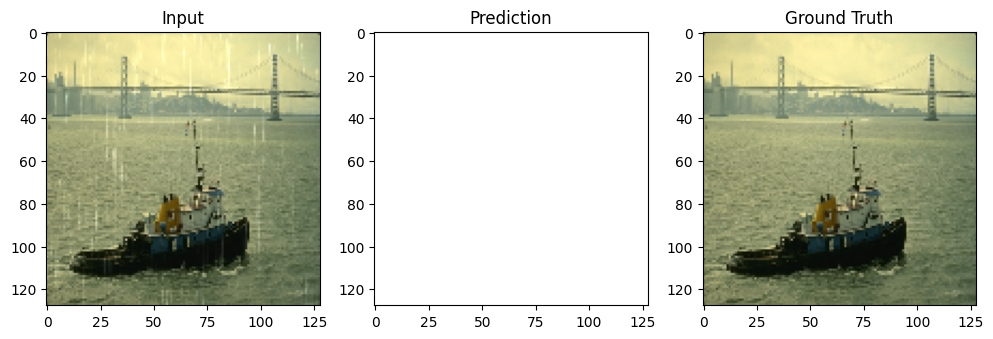

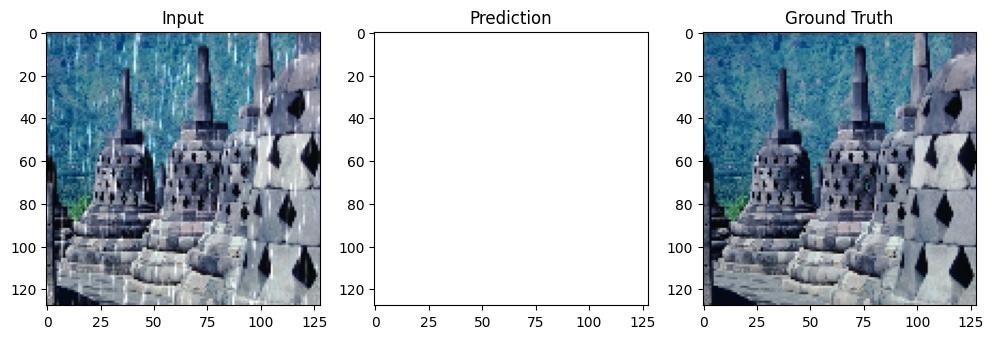

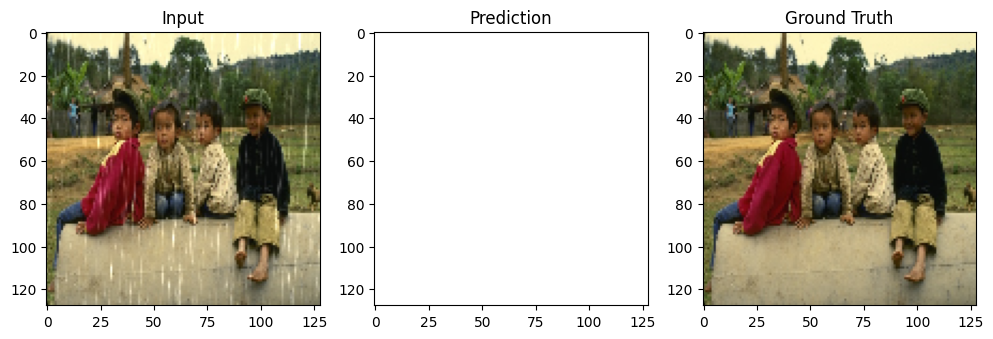

ValueError: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.io import imread
from skimage import img_as_float
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
import os
import glob
from tensorflow.keras import backend as K

K.clear_session()

# Load and preprocess images from a given folder
def load_images_from_folder(folder, size=(128, 128)):
    images = []
    for filename in glob.glob(os.path.join(folder, '*.png')):
        img = imread(filename)
        img = img_as_float(img)
        img_resized = tf.image.resize(img, size).numpy()
        
        # Scale the images to [-1, 1]
        img_resized = img_resized * 2 - 1
        images.append(img_resized)
    return np.array(images)


# Data preprocessing and augmentation pipeline
def preprocess_and_augment_data(images, augment=False):
    if augment:
        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.01,
            zoom_range=[0.9, 1.25],
            horizontal_flip=True,
            fill_mode='reflect'
        )
        augmented_images = datagen.flow(images, batch_size=len(images), shuffle=False)
        augmented_images = next(augmented_images)  # Fetch the augmented images
        return augmented_images
    return images

# Function to load datasets from base folder (for both training and testing)
def load_and_preprocess_datasets(base_folder, size=(128, 128), augment=False):
    rainy_images_train, clear_images_train = [], []
    rainy_images_test, clear_images_test = [], []

    datasets = ['Rain200L']  # , 'Rain200H' Add more datasets if necessary

    for dataset in datasets:
        train_folder = os.path.join(base_folder, dataset, 'train')
        test_folder = os.path.join(base_folder, dataset, 'test')

        # Load training data
        rainy_train_folder = os.path.join(train_folder, 'input')
        clear_train_folder = os.path.join(train_folder, 'target')
        rainy_images_train.extend(load_images_from_folder(rainy_train_folder, size))
        clear_images_train.extend(load_images_from_folder(clear_train_folder, size))

        # Load testing data
        rainy_test_folder = os.path.join(test_folder, 'input')
        clear_test_folder = os.path.join(test_folder, 'target')
        rainy_images_test.extend(load_images_from_folder(rainy_test_folder, size))
        clear_images_test.extend(load_images_from_folder(clear_test_folder, size))

    # Convert lists to numpy arrays
    rainy_images_train = np.array(rainy_images_train)
    clear_images_train = np.array(clear_images_train)
    rainy_images_test = np.array(rainy_images_test)
    clear_images_test = np.array(clear_images_test)

    # Apply data augmentation to training data (if augment is True)
    if augment:
        rainy_images_train = preprocess_and_augment_data(rainy_images_train, augment=True)
        clear_images_train = preprocess_and_augment_data(clear_images_train, augment=True)

    return (rainy_images_train, clear_images_train), (rainy_images_test, clear_images_test)

# Global variable for VGG model
vgg = VGG19(include_top=False, input_shape=(128, 128, 3))
vgg.trainable = False
vgg_feat_extractor = Model(inputs=vgg.input, outputs=vgg.get_layer('block3_conv3').output)

# Perceptual Loss Function
def perceptual_loss(y_true, y_pred):
    true_features = vgg_feat_extractor(y_true)
    pred_features = vgg_feat_extractor(y_pred)
    return tf.reduce_mean(tf.square(true_features - pred_features))

# SSIM Loss
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))

# Total Variation Loss (for sharpness)
def total_variation_loss(y_pred):
    return tf.image.total_variation(y_pred)

# Combined loss function to incorporate perceptual, SSIM, and total variation losses
def combined_loss(y_true, y_pred):
    perceptual = perceptual_loss(y_true, y_pred)
    ssim_loss_val = ssim_loss(y_true, y_pred)
    tv_loss = total_variation_loss(y_pred)
    
    # Combine losses with different weights
    return 0.8 * perceptual + 0.1 * ssim_loss_val + 0.1 * tv_loss


# Swin Transformer block implementation
class SwinTransformerBlock(layers.Layer):
    def __init__(self, dim, num_heads, mlp_ratio=4., dropout=0.1):
        super(SwinTransformerBlock, self).__init__()
        self.norm1 = layers.LayerNormalization(epsilon=1e-5)
        self.norm2 = layers.LayerNormalization(epsilon=1e-5)

        self.attn = layers.MultiHeadAttention(num_heads=num_heads, key_dim=dim, dropout=dropout)

        self.mlp = tf.keras.Sequential([
            layers.Dense(int(dim * mlp_ratio), activation='relu'),
            layers.Dense(dim)
        ])

    def call(self, x):
        h = self.norm1(x)
        attn_output = self.attn(h, h)
        x = x + attn_output
        h = self.norm2(x)
        x = x + self.mlp(h)
        return x

# Swin Transformer Layer
class SwinTransformerLayer(layers.Layer):
    def __init__(self, dim, depth, num_heads, mlp_ratio=4., dropout=0.1):
        super(SwinTransformerLayer, self).__init__()
        self.blocks = [SwinTransformerBlock(dim, num_heads, mlp_ratio, dropout) for _ in range(depth)]

    def call(self, x):
        for block in self.blocks:
            x = block(x)
        return x

# Swin Transformer Block (with variable depths)
def swin_transformer_block(input_tensor, num_heads, embed_dim, depth):
    height, width = input_tensor.shape[1], input_tensor.shape[2]  
    embed_layer = layers.Conv2D(embed_dim, kernel_size=4, strides=2, padding='same')(input_tensor)
    reshaped_layer = layers.Reshape((height // 2 * width // 2, embed_dim))(embed_layer)

    swin_layer = SwinTransformerLayer(embed_dim, depth, num_heads)
    transformed_layer = swin_layer(reshaped_layer)

    output_layer = layers.Reshape((height // 2, width // 2, embed_dim))(transformed_layer)
    return output_layer

# U-Net Encoder Block
def unet_encoder_block(input_tensor, filters):
    x = layers.Conv2D(filters, (3, 3), padding='same')(input_tensor)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.ReLU()(x)
    return x

# U-Net Decoder Block
def unet_decoder_block(input_tensor, filters):
    x = layers.Conv2D(filters, (3, 3), padding='same')(input_tensor)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.ReLU()(x)
    return x

# Hybrid U-Net + Swin Transformer Model
def unet_swin_transformer(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    enc1 = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    swin1 = swin_transformer_block(enc1, num_heads=4, embed_dim=64, depth=6)  # Swin1: 4 times
    pool1 = layers.Conv2D(128, (3, 3), strides=2, padding='same')(swin1)

    enc2 = unet_encoder_block(pool1, 128)
    swin2 = swin_transformer_block(enc2, num_heads=4, embed_dim=128, depth=4)  # Swin2: 2 times
    pool2 = layers.Conv2D(256, (3, 3), strides=2, padding='same')(swin2)

    enc3 = unet_encoder_block(pool2, 256)
    swin3 = swin_transformer_block(enc3, num_heads=4, embed_dim=256, depth=2)  # Swin3: 1 time
    pool3 = layers.Conv2D(512, (3, 3), strides=2, padding='same')(swin3)

    # Bottleneck
    bottleneck = unet_encoder_block(pool3, 512)

    # Decoder with Skip Connections
    dec3 = unet_decoder_block(bottleneck, 256)
    dec3 = layers.UpSampling2D(size=(2, 2))(dec3)  # Upsample to match swin3 (16x16)
    dec3 = layers.Concatenate()([dec3, swin3])

    dec2 = unet_decoder_block(dec3, 128)
    dec2 = layers.UpSampling2D(size=(2, 2))(dec2)  # Upsample to match swin2 (32x32)
    dec2 = layers.UpSampling2D(size=(2, 2))(dec2)
    dec2 = layers.Concatenate()([dec2, swin2])

    dec1 = unet_decoder_block(dec2, 64)
    dec1 = layers.UpSampling2D(size=(2, 2))(dec1)  # Upsample to match swin1 (64x64)
    dec1 = layers.UpSampling2D(size=(2, 2))(dec1)
    dec1 = layers.Concatenate()([dec1, swin1])
    
    print("Shape of dec1:", dec1.shape)
    
    outputs = layers.UpSampling2D(size=(2, 2))(dec1)  # Upsample from (64, 64) to (128, 128)
    outputs = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(outputs)  # Optional Conv2D for refinement

    outputs = layers.Conv2D(3, (1, 1), activation='tanh')(outputs)
    print("Shape of outputs:", outputs.shape)
    
    return Model(inputs, outputs)


# Compile the model
input_shape = (128, 128, 3)
model = unet_swin_transformer(input_shape)
model.compile(optimizer=Adam(learning_rate=1e-4), loss=combined_loss, metrics=['mae'])

# Model summary to check the layer dimensions
model.summary()

# Loading datasets
(train_rainy, train_clear), (test_rainy, test_clear) = load_and_preprocess_datasets('/kaggle/input/derainingdata/RainData', augment=True)

# Train the model
model.fit(train_rainy, train_clear, batch_size=2, epochs=1, validation_data=(test_rainy, test_clear))

# Evaluate model performance on testing set
predictions = model.predict(test_rainy, batch_size = 1)
for i in range(3):  # Display 3 examples
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow((test_rainy[i] + 1) / 2)  # Convert back to [0, 1]
    plt.title("Input")
    plt.subplot(1, 3, 2)
    plt.imshow((predictions[i] + 1) / 2)  # Convert back to [0, 1]
    plt.title("Prediction")
    plt.subplot(1, 3, 3)
    plt.imshow((test_clear[i] + 1) / 2)  # Convert back to [0, 1]
    plt.title("Ground Truth")
    plt.show()

# Calculate PSNR and SSIM metrics for the evaluation
for i in range(len(test_rainy)):
    pred_img = (predictions[i] + 1) / 2  # Convert to [0, 1]
    gt_img = (test_clear[i] + 1) / 2  # Convert to [0, 1]
    
    psnr_value = psnr(gt_img, pred_img)
    ssim_value = ssim(gt_img, pred_img, multichannel=True)
    print(f"Image {i+1}: PSNR = {psnr_value}, SSIM = {ssim_value}")




# Revised Unet + swin 

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import os
import glob
from skimage.io import imread
from skimage import img_as_float
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess images from a given folder
def load_images_from_folder(folder, size=(128, 128)):
    images = []
    for filename in glob.glob(os.path.join(folder, '*.png')):
        img = imread(filename)
        img = img_as_float(img)  # Convert image to float in [0, 1]
        img_resized = tf.image.resize(img, size).numpy()
        # Remove normalization if img_as_float is already in [0, 1]
        images.append(img_resized)
    return np.array(images)

# Data preprocessing and augmentation pipeline
def preprocess_and_augment_data(images, augment=False):
    if augment:
        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.01,
            zoom_range=[0.9, 1.25],
            horizontal_flip=True,
            fill_mode='reflect'
        )
        augmented_images = datagen.flow(images, batch_size=len(images), shuffle=False)
        augmented_images = next(augmented_images)  # Fetch the augmented images
        return augmented_images
    return images

# Function to load datasets from base folder (for both training and testing)
def load_and_preprocess_datasets(base_folder, size=(128, 128), augment=False):
    rainy_images_train, clear_images_train = [], []
    rainy_images_test, clear_images_test = [], []

    datasets = ['Rain200L', 'Rain200H']  # Add more datasets if necessary

    for dataset in datasets:
        train_folder = os.path.join(base_folder, dataset, 'train')
        test_folder = os.path.join(base_folder, dataset, 'test')

        # Load training data
        rainy_train_folder = os.path.join(train_folder, 'input')
        clear_train_folder = os.path.join(train_folder, 'target')
        rainy_images_train.extend(load_images_from_folder(rainy_train_folder, size))
        clear_images_train.extend(load_images_from_folder(clear_train_folder, size))

        # Load testing data
        rainy_test_folder = os.path.join(test_folder, 'input')
        clear_test_folder = os.path.join(test_folder, 'target')
        rainy_images_test.extend(load_images_from_folder(rainy_test_folder, size))
        clear_images_test.extend(load_images_from_folder(clear_test_folder, size))

    # Convert lists to numpy arrays
    rainy_images_train = np.array(rainy_images_train)
    clear_images_train = np.array(clear_images_train)
    rainy_images_test = np.array(rainy_images_test)
    clear_images_test = np.array(clear_images_test)

    # Apply data augmentation to training data (if augment is True)
    if augment:
        rainy_images_train = preprocess_and_augment_data(rainy_images_train, augment=True)
        clear_images_train = preprocess_and_augment_data(clear_images_train, augment=True)

    return (rainy_images_train, clear_images_train), (rainy_images_test, clear_images_test)

# Swin Transformer block implementation
class SwinTransformerBlock(layers.Layer):
    def __init__(self, dim, num_heads, mlp_ratio=4., dropout=0.0):
        super(SwinTransformerBlock, self).__init__()
        self.dim = dim
        self.num_heads = num_heads

        # Layer normalization
        self.norm1 = layers.LayerNormalization(epsilon=1e-5)
        self.norm2 = layers.LayerNormalization(epsilon=1e-5)

        # Multi-head self-attention layer
        self.attn = layers.MultiHeadAttention(num_heads=num_heads, key_dim=dim, dropout=dropout)

        # MLP layer
        self.mlp = tf.keras.Sequential([
            layers.Dense(int(dim * mlp_ratio), activation='relu'),
            layers.Dense(dim)
        ])

    def call(self, x):
        h = self.norm1(x)  # Apply normalization for attention
        attn_output = self.attn(h, h)  # Self-attention

        # Residual connection
        x = x + attn_output

        h = self.norm2(x)  # Apply normalization for MLP
        x = x + self.mlp(h)  # Residual connection for MLP
        return x

# Window-based Swin Transformer Layer (basic building block)
class SwinTransformerLayer(layers.Layer):
    def __init__(self, dim, depth, num_heads, mlp_ratio=4., dropout=0.0):
        super(SwinTransformerLayer, self).__init__()
        self.blocks = [SwinTransformerBlock(dim, num_heads, mlp_ratio, dropout) for _ in range(depth)]

    def call(self, x):
        for block in self.blocks:
            x = block(x)
        return x

# Window-based Swin Transformer block applied after each downsampling
def swin_transformer_block(input_tensor, num_heads, embed_dim, depths):
    height, width = input_tensor.shape[1], input_tensor.shape[2]  # Keras tensor shape
    embed_layer = layers.Conv2D(embed_dim, kernel_size=4, strides=2, padding='same')(input_tensor)  # Reduce spatial size
    print(f"After embedding: {embed_layer.shape}")  # Print dimension after embedding

    # Reshape for Swin Transformer: Batch, Height * Width, Channels
    reshaped_layer = layers.Reshape((height // 2 * width // 2, embed_dim))(embed_layer)

    # Apply Swin Transformer layers (recursive depth)
    swin_layer = SwinTransformerLayer(embed_dim, depths[0], num_heads)
    transformed_layer = swin_layer(reshaped_layer)

    # Reshape back to original spatial dimensions
    output_layer = layers.Reshape((height // 2, width // 2, embed_dim))(transformed_layer)
    print(f"Output of Swin block: {output_layer.shape}")  # Print dimension after Swin Transformer block

    return output_layer

# U-Net Encoder Block
def unet_encoder_block(input_tensor, filters):
    x = layers.Conv2D(filters, (3, 3), padding='same')(input_tensor)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.ReLU()(x)
    print(f"After encoder block with {filters} filters: {x.shape}")  # Print dimension after encoder block
    return x

# U-Net Decoder Block
def unet_decoder_block(input_tensor, filters):
    x = layers.Conv2D(filters, (3, 3), padding='same')(input_tensor)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.ReLU()(x)
    print(f"After decoder block with {filters} filters: {x.shape}")  # Print dimension after decoder block
    return x

# Hybrid U-Net + Swin Transformer Model
def unet_swin_transformer(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder (with multi-scale feature extraction)
    enc1 = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    swin1 = swin_transformer_block(enc1, num_heads=4, embed_dim=64, depths=[2])
    pool1 = layers.Conv2D(128, (3, 3), strides=2, padding='same')(swin1)
    print(f"After first pooling: {pool1.shape}")  # Print dimension after first pooling

    enc2 = unet_encoder_block(pool1, 128)
    swin2 = swin_transformer_block(enc2, num_heads=4, embed_dim=128, depths=[2])
    pool2 = layers.Conv2D(256, (3, 3), strides=2, padding='same')(swin2)
    print(f"After second pooling: {pool2.shape}")  # Print dimension after second pooling

    enc3 = unet_encoder_block(pool2, 256)
    swin3 = swin_transformer_block(enc3, num_heads=4, embed_dim=256, depths=[2])
    pool3 = layers.Conv2D(512, (3, 3), strides=2, padding='same')(swin3)
    print(f"After third pooling: {pool3.shape}")  # Print dimension after third pooling

    # Bottleneck
    bottleneck = unet_encoder_block(pool3, 512)
    print(f"After bottleneck: {bottleneck.shape}")  # Print dimension after bottleneck

    # Decoder
    dec3 = unet_decoder_block(bottleneck, 256)
    dec3 = layers.UpSampling2D(size=(2, 2))(dec3)  # Upsample to match swin3
    print(f"After upsampling dec3 to match swin3: {dec3.shape}")  # Print upsampled dimension
    dec3 = layers.Concatenate()([dec3, swin3])  # Concatenate with skip connection from swin3
    print(f"After concatenation with skip connection from swin3: {dec3.shape}")  # Print dimension after concatenation

    dec2 = unet_decoder_block(dec3, 128)
    dec2 = layers.UpSampling2D(size=(2, 2))(dec2)  # Upsample to match swin2
    print(f"After upsampling dec2 to match swin2: {dec2.shape}")  # Print upsampled dimension

    # Downsample swin2 to match dec2's shape
    swin2_downsampled = layers.Conv2D(128, kernel_size=3, strides=2, padding='same')(swin2)
    print(f"After downsampling swin2: {swin2_downsampled.shape}")  # Print downsampled swin2 shape
    dec2 = layers.Concatenate()([dec2, swin2_downsampled])  # Concatenate with skip connection from downsampled swin2
    print(f"After concatenation with skip connection from swin2: {dec2.shape}")  # Print dimension after concatenation

    dec1 = unet_decoder_block(dec2, 64)
    dec1 = layers.UpSampling2D(size=(2, 2))(dec1)  # Upsample to match swin1
    print(f"After upsampling dec1 to match swin1: {dec1.shape}")  # Print upsampled dimension

    # Upsample swin1 to match dec1's shape
    swin1_downsampled = layers.Conv2D(64, kernel_size=3, strides=(4, 4), padding='same')(swin1)
    #swin1_upsampled = layers.UpSampling2D(size=(2, 2))(swin1_upsampled)  # Ensure the dimensions match after upsampling
    print(f"After upsampling swin1: {swin1_downsampled.shape}")  # Print upsampled swin1 shape
    dec1 = layers.Concatenate()([dec1, swin1_downsampled])  # Concatenate with skip connection from upsampled swin1
    print(f"After concatenation with skip connection from swin1: {dec1.shape}")  # Print dimension after concatenation
    
    upsampled = layers.Conv2DTranspose(filters=64, kernel_size=4, strides=2, padding='same')(dec1)
    upsampled = layers.Conv2DTranspose(filters=64, kernel_size=4, strides=2, padding='same')(upsampled)
    upsampled = layers.Conv2DTranspose(filters=64, kernel_size=4, strides=2, padding='same')(upsampled)


    # Output layer (assuming 3-channel RGB output)
    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(upsampled)
    print(f"Output layer shape: {outputs.shape}")  # Print output shape

    return Model(inputs, outputs)


# Load dataset
base_folder = '/kaggle/input/derainingdata/RainData'  # Replace with your dataset path
(train_rainy, train_clear), (test_rainy, test_clear) = load_and_preprocess_datasets(base_folder, augment=True)

# Instantiate and compile model
input_shape = (128, 128, 3)  # Assuming input images are RGB
model = unet_swin_transformer(input_shape)
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

# Model summary
model.summary()

# Training
history = model.fit(train_rainy, train_clear, validation_split=0.1, epochs=20, batch_size=4)

# Calculate PSNR and SSIM
def calculate_metrics(predictions, ground_truth):
    psnr_values = []
    ssim_values = []
    
    # Define a smaller window size if images are less than 7x7
    win_size = 3  # Use a smaller window size if necessary
    
    # Determine the data range
    data_range = 1.0  # Assuming images are normalized between [0, 1]
    
    for i in range(predictions.shape[0]):
        psnr_val = psnr(ground_truth[i], predictions[i])
        
        # Ensure the window size is appropriate for the image dimensions
        if ground_truth[i].shape[0] < 7 or ground_truth[i].shape[1] < 7:
            ssim_val = ssim(ground_truth[i], predictions[i], multichannel=True, win_size=3, data_range=data_range)
        else:
            ssim_val = ssim(ground_truth[i], predictions[i], multichannel=True, win_size=win_size, data_range=data_range)
        
        psnr_values.append(psnr_val)
        ssim_values.append(ssim_val)
    
    return np.mean(psnr_values), np.mean(ssim_values)

# Evaluation
try:
    predictions = model.predict(test_rainy, batch_size=1)  # Use smaller batch size to avoid memory issues

    # Display predictions
    for i in range(min(5, predictions.shape[0])):
        plt.subplot(1, 3, 1)
        plt.imshow(test_rainy[i])
        plt.title('Rainy Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(predictions[i])
        plt.title('Predicted Image')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(test_clear[i])
        plt.title('Ground Truth Image')
        plt.axis('off')

        plt.show()

    # Calculate PSNR and SSIM
    mean_psnr, mean_ssim = calculate_metrics(predictions, test_clear)
    print(f"Mean PSNR: {mean_psnr}, Mean SSIM: {mean_ssim}")

except Exception as e:
    print("Error during evaluation:", e)



'''# Evaluation
predictions = model.predict(test_rainy)

# Display predictions
for i in range(min(5, predictions.shape[0])):
    plt.subplot(1, 3, 1)
    plt.imshow(test_rainy[i])
    plt.title('Rainy Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(predictions[i])
    plt.title('Predicted Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(test_clear[i])
    plt.title('Ground Truth Image')
    plt.axis('off')

    plt.show()

# Calculate PSNR and SSIM
def calculate_metrics(predictions, ground_truth):
    psnr_values = []
    ssim_values = []
    for i in range(predictions.shape[0]):
        psnr_val = psnr(ground_truth[i], predictions[i])
        ssim_val = ssim(ground_truth[i], predictions[i], multichannel=True)
        psnr_values.append(psnr_val)
        ssim_values.append(ssim_val)
    return np.mean(psnr_values), np.mean(ssim_values)

mean_psnr, mean_ssim = calculate_metrics(predictions, test_clear)
print(f"Mean PSNR: {mean_psnr}, Mean SSIM: {mean_ssim}")'''




ValueError: 'size' must be a 1-D int32 Tensor

# UNet + swin

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import os
import glob
from skimage.io import imread
from skimage import img_as_float
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess images from a given folder
def load_images_from_folder(folder, size=(128, 128)):
    images = []
    for filename in glob.glob(os.path.join(folder, '*.png')):
        img = imread(filename)
        img = img_as_float(img)
        img_resized = tf.image.resize(img, size).numpy()
        images.append(img_resized)
    return np.array(images)

# Data preprocessing and augmentation pipeline
def preprocess_and_augment_data(images, augment=False):
    if augment:
        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.01,
            zoom_range=[0.9, 1.25],
            horizontal_flip=True,
            fill_mode='reflect'
        )
        augmented_images = datagen.flow(images, batch_size=len(images), shuffle=False)
        augmented_images = next(augmented_images)  # Fetch the augmented images
        return augmented_images
    return images

# Function to load datasets from base folder (for both training and testing)
def load_and_preprocess_datasets(base_folder, size=(128, 128), augment=False):
    rainy_images_train, clear_images_train = [], []
    rainy_images_test, clear_images_test = [], []

    datasets = ['Rain200L', 'Rain200H']  # Add more datasets if necessary

    for dataset in datasets:
        train_folder = os.path.join(base_folder, dataset, 'train')
        test_folder = os.path.join(base_folder, dataset, 'test')

        # Load training data
        rainy_train_folder = os.path.join(train_folder, 'input')
        clear_train_folder = os.path.join(train_folder, 'target')
        rainy_images_train.extend(load_images_from_folder(rainy_train_folder, size))
        clear_images_train.extend(load_images_from_folder(clear_train_folder, size))

        # Load testing data
        rainy_test_folder = os.path.join(test_folder, 'input')
        clear_test_folder = os.path.join(test_folder, 'target')
        rainy_images_test.extend(load_images_from_folder(rainy_test_folder, size))
        clear_images_test.extend(load_images_from_folder(clear_test_folder, size))

    # Convert lists to numpy arrays
    rainy_images_train = np.array(rainy_images_train)
    clear_images_train = np.array(clear_images_train)
    rainy_images_test = np.array(rainy_images_test)
    clear_images_test = np.array(clear_images_test)

    # Apply data augmentation to training data (if augment is True)
    if augment:
        rainy_images_train = preprocess_and_augment_data(rainy_images_train, augment=True)
        clear_images_train = preprocess_and_augment_data(clear_images_train, augment=True)

    return (rainy_images_train, clear_images_train), (rainy_images_test, clear_images_test)

# Swin Transformer block implementation
class SwinTransformerBlock(layers.Layer):
    def __init__(self, dim, num_heads, mlp_ratio=4., dropout=0.0):
        super(SwinTransformerBlock, self).__init__()
        self.dim = dim
        self.num_heads = num_heads

        # Layer normalization
        self.norm1 = layers.LayerNormalization(epsilon=1e-5)
        self.norm2 = layers.LayerNormalization(epsilon=1e-5)

        # Multi-head self-attention layer
        self.attn = layers.MultiHeadAttention(num_heads=num_heads, key_dim=dim, dropout=dropout)

        # MLP layer
        self.mlp = tf.keras.Sequential([
            layers.Dense(int(dim * mlp_ratio), activation='relu'),
            layers.Dense(dim)
        ])

    def call(self, x):
        h = self.norm1(x)  # Apply normalization for attention
        attn_output = self.attn(h, h)  # Self-attention

        # Residual connection
        x = x + attn_output

        h = self.norm2(x)  # Apply normalization for MLP
        x = x + self.mlp(h)  # Residual connection for MLP
        return x

# Window-based Swin Transformer Layer (basic building block)
class SwinTransformerLayer(layers.Layer):
    def __init__(self, dim, depth, num_heads, mlp_ratio=4., dropout=0.0):
        super(SwinTransformerLayer, self).__init__()
        self.blocks = [SwinTransformerBlock(dim, num_heads, mlp_ratio, dropout) for _ in range(depth)]

    def call(self, x):
        for block in self.blocks:
            x = block(x)
        return x

# Swin transformer block applied after each downsampling
def swin_transformer_block(input_tensor, num_heads, embed_dim, depths):
    # Patch partition (flatten input image into non-overlapping patches)
    height, width = input_tensor.shape[1], input_tensor.shape[2]  # Keras tensor shape
    embed_layer = layers.Conv2D(embed_dim, kernel_size=4, strides=2, padding='same')(input_tensor)  # Reduce spatial size

    # Reshape for Swin Transformer: Batch, Height * Width, Channels
    reshaped_layer = layers.Reshape((height // 2 * width // 2, embed_dim))(embed_layer)

    # Apply Swin Transformer layers (recursive depth)
    swin_layer = SwinTransformerLayer(embed_dim, depths[0], num_heads)
    transformed_layer = swin_layer(reshaped_layer)

    # Reshape back to original spatial dimensions
    output_layer = layers.Reshape((height // 2, width // 2, embed_dim))(transformed_layer)

    return output_layer

# U-Net Encoder Block (with Strided Convolutions for downsampling)
def unet_encoder_block(input_tensor, filters, kernel_size=3, padding='same', strides=1):
    x = layers.Conv2D(filters, kernel_size, padding=padding, strides=strides)(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, kernel_size, padding=padding, strides=strides)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

# U-Net Decoder Block
def unet_decoder_block(input_tensor, skip_tensor, filters, kernel_size=3, padding='same', strides=1):
    x = layers.Conv2DTranspose(filters, kernel_size, padding=padding, strides=2)(input_tensor)
    # Ensure dimensions are correct before concatenation
    if skip_tensor.shape[1] != x.shape[1] or skip_tensor.shape[2] != x.shape[2]:
        x = layers.Resizing(skip_tensor.shape[1], skip_tensor.shape[2])(x)  # Resize if needed
    print(f"Decoding: {x.shape}, Skip: {skip_tensor.shape}")
    x = layers.Concatenate()([x, skip_tensor])
    x = layers.Conv2D(filters, kernel_size, padding=padding, strides=strides)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

# Hybrid U-Net + Swin Transformer Model
def unet_swin_transformer(input_shape):
    inputs = layers.Input(shape=input_shape)

    # U-Net Encoder with Strided Convolutions and Swin Transformer at each downsampling step
    enc1 = unet_encoder_block(inputs, 64)
    swin1 = swin_transformer_block(enc1, num_heads=4, embed_dim=64, depths=[2])
    pool1 = layers.Conv2D(128, (3, 3), strides=2, padding='same')(swin1)  # Strided convolution for downsampling

    enc2 = unet_encoder_block(pool1, 128)
    swin2 = swin_transformer_block(enc2, num_heads=4, embed_dim=128, depths=[2])
    pool2 = layers.Conv2D(256, (3, 3), strides=2, padding='same')(swin2)  # Strided convolution for downsampling

    enc3 = unet_encoder_block(pool2, 256)
    swin3 = swin_transformer_block(enc3, num_heads=4, embed_dim=256, depths=[2])
    pool3 = layers.Conv2D(512, (3, 3), strides=2, padding='same')(swin3)  # Strided convolution for downsampling

    enc4 = unet_encoder_block(pool3, 512)
    swin4 = swin_transformer_block(enc4, num_heads=4, embed_dim=512, depths=[2])

    # Bottleneck
    bottleneck = layers.Conv2D(1024, (3, 3), strides=2, padding='same')(swin4)

    # Decoder with Skip Connections
    dec4 = unet_decoder_block(bottleneck, enc4, 512)
    dec3 = unet_decoder_block(dec4, enc3, 256)
    dec2 = unet_decoder_block(dec3, enc2, 128)
    dec1 = unet_decoder_block(dec2, enc1, 64)

    # Final output layer
    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(dec1)

    # Model definition
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Instantiate and compile the model
input_shape = (128, 128, 3)  # Input image dimensions
model = unet_swin_transformer(input_shape)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error')

# Print model summary
model.summary()
# Function to calculate PSNR and SSIM
def calculate_metrics(original, generated):
    psnr_value = psnr(original, generated)
    ssim_value = ssim(original, generated, multichannel=True)
    return psnr_value, ssim_value

# Training function
def train_model(model, train_data, epochs=100, batch_size=16):
    rainy_images, clear_images = train_data
    model.fit(rainy_images, clear_images, epochs=epochs, batch_size=batch_size)

# Evaluation function on the test set
def evaluate_model(model, test_data):
    rainy_images_test, clear_images_test = test_data
    predictions = model.predict(rainy_images_test)

    # Calculate metrics for each image
    psnr_values = []
    ssim_values = []
    for i in range(len(predictions)):
        psnr_value, ssim_value = calculate_metrics(clear_images_test[i], predictions[i])
        psnr_values.append(psnr_value)
        ssim_values.append(ssim_value)

    avg_psnr = np.mean(psnr_values)
    avg_ssim = np.mean(ssim_values)

    return avg_psnr, avg_ssim

# Example usage
base_folder = '/kaggle/input/derainingdata/RainData'
(train_data, test_data) = load_and_preprocess_datasets(base_folder, augment=True)
train_model(model, train_data, epochs=10, batch_size=16)
avg_psnr, avg_ssim = evaluate_model(model, test_data)

print(f'Average PSNR: {avg_psnr}, Average SSIM: {avg_ssim}')

# Display predicted images (for the first 5 test images)
predictions = model.predict(test_data[0])
for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow(test_data[0][i])  # Display rainy image
    plt.axis('off')
    plt.subplot(3, 5, i + 6)
    plt.imshow(predictions[i])  # Display predicted clear image
    plt.axis('off')
    plt.subplot(3, 5, i + 11)
    plt.imshow(test_data[1][i])  # Display ground truth image
    plt.axis('off')
plt.show()

# Image Preprocessing

In [ ]:
import os
import glob
import numpy as np
import tensorflow as tf
from skimage.io import imread
from skimage import img_as_float
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess images from a given folder
def load_images_from_folder(folder, size=(128, 128)):
    images = []
    for filename in glob.glob(os.path.join(folder, '*.png')):
        img = imread(filename)
        img = img_as_float(img)
        img_resized = tf.image.resize(img, size).numpy()
        images.append(img_resized)
    return np.array(images)

# Data preprocessing and augmentation pipeline
def preprocess_and_augment_data(images, augment=False):
    if augment:
        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.01,
            zoom_range=[0.9, 1.25],
            horizontal_flip=True,
            fill_mode='reflect'
        )
        augmented_images = datagen.flow(images, batch_size=len(images), shuffle=False)
        augmented_images = next(augmented_images)  # Fetch the augmented images
        return augmented_images
    return images

# Function to load datasets from base folder (for both training and testing)
def load_and_preprocess_datasets(base_folder, size=(128, 128), augment=False):
    rainy_images_train, clear_images_train = [], []
    rainy_images_test, clear_images_test = [], []  # Corrected initialization

    datasets = ['Rain200L', 'Rain200H']  # Add more datasets if necessary

    for dataset in datasets:
        train_folder = os.path.join(base_folder, dataset, 'train')
        test_folder = os.path.join(base_folder, dataset, 'test')

        # Load training data
        rainy_train_folder = os.path.join(train_folder, 'input')
        clear_train_folder = os.path.join(train_folder, 'target')
        rainy_images_train.extend(load_images_from_folder(rainy_train_folder, size))
        clear_images_train.extend(load_images_from_folder(clear_train_folder, size))

        # Load testing data
        rainy_test_folder = os.path.join(test_folder, 'input')
        clear_test_folder = os.path.join(test_folder, 'target')
        rainy_images_test.extend(load_images_from_folder(rainy_test_folder, size))
        clear_images_test.extend(load_images_from_folder(clear_test_folder, size))

    # Convert lists to numpy arrays
    rainy_images_train = np.array(rainy_images_train)
    clear_images_train = np.array(clear_images_train)
    rainy_images_test = np.array(rainy_images_test)
    clear_images_test = np.array(clear_images_test)

    # Apply data augmentation to training data (if augment is True)
    if augment:
        rainy_images_train = preprocess_and_augment_data(rainy_images_train, augment=True)
        clear_images_train = preprocess_and_augment_data(clear_images_train, augment=True)

    return (rainy_images_train, clear_images_train), (rainy_images_test, clear_images_test)

# Example usage
base_folder = '/kaggle/input/derainingdata/RainData'
(train_rainy, train_clear), (test_rainy, test_clear) = load_and_preprocess_datasets(base_folder, size=(128, 128), augment=True)

print(f"Training Rainy Images Shape: {train_rainy.shape}")
print(f"Training Clear Images Shape: {train_clear.shape}")
print(f"Testing Rainy Images Shape: {test_rainy.shape}")
print(f"Testing Clear Images Shape: {test_clear.shape}")


# Pyramid Model

In [ ]:
# Advanced Dynamic Pyramid Model
def advanced_dynamic_pyramid_model(input_shape, num_scales=3):
    inputs = Input(shape=input_shape)
    pyramid_features = []

    for scale in range(num_scales):
        scale_factor = 2 ** scale
        
        # Resizing each input for different scales
        x_scaled = Lambda(lambda x: tf.image.resize(x, 
                            [input_shape[0] // scale_factor, input_shape[1] // scale_factor]))(inputs)
        
        # Dynamic kernel size based on scale
        kernel_size = 3 + scale
        
        # Use Depthwise Separable Convolutions
        x_conv = DepthwiseConv2D((kernel_size, kernel_size), padding='same', activation='relu')(x_scaled)
        x_conv = Conv2D(64 * scale_factor, (1, 1), padding='same')(x_conv)  # Pointwise Conv
        
        # Residual connection
        x_scaled_conv = Conv2D(64 * scale_factor, (1, 1), padding='same')(x_scaled)
        x_conv = Add()([x_conv, x_scaled_conv])
        
        # Resize back to original input size before concatenation
        x_resized = Lambda(lambda x: tf.image.resize(x, 
                              [input_shape[0], input_shape[1]]))(x_conv)
        
        pyramid_features.append(x_resized)

    # Concatenate all pyramid features along channel axis
    fused_features = Lambda(
        lambda x: tf.concat(x, axis=-1),
    )(pyramid_features)
    
    return inputs, fused_features

# Swin transformer for image Restoration

In [ ]:
# -----------------------------------------------------------------------------------
# SwinIR: Image Restoration Using Swin Transformer, https://arxiv.org/abs/2108.10257
# Originally Written by Ze Liu, Modified by Jingyun Liang.
# -----------------------------------------------------------------------------------

import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.checkpoint as checkpoint
from timm.models.layers import DropPath, to_2tuple, trunc_normal_


class Mlp(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, act_layer=nn.GELU, drop=0.):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.act = act_layer()
        self.fc2 = nn.Linear(hidden_features, out_features)
        self.drop = nn.Dropout(drop)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        return x


def window_partition(x, window_size):
    """
    Args:
        x: (B, H, W, C)
        window_size (int): window size

    Returns:
        windows: (num_windows*B, window_size, window_size, C)
    """
    B, H, W, C = x.shape
    x = x.view(B, H // window_size, window_size, W // window_size, window_size, C)
    windows = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(-1, window_size, window_size, C)
    return windows


def window_reverse(windows, window_size, H, W):
    """
    Args:
        windows: (num_windows*B, window_size, window_size, C)
        window_size (int): Window size
        H (int): Height of image
        W (int): Width of image

    Returns:
        x: (B, H, W, C)
    """
    B = int(windows.shape[0] / (H * W / window_size / window_size))
    x = windows.view(B, H // window_size, W // window_size, window_size, window_size, -1)
    x = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(B, H, W, -1)
    return x


class WindowAttention(nn.Module):
    r""" Window based multi-head self attention (W-MSA) module with relative position bias.
    It supports both of shifted and non-shifted window.

    Args:
        dim (int): Number of input channels.
        window_size (tuple[int]): The height and width of the window.
        num_heads (int): Number of attention heads.
        qkv_bias (bool, optional):  If True, add a learnable bias to query, key, value. Default: True
        qk_scale (float | None, optional): Override default qk scale of head_dim ** -0.5 if set
        attn_drop (float, optional): Dropout ratio of attention weight. Default: 0.0
        proj_drop (float, optional): Dropout ratio of output. Default: 0.0
    """

    def __init__(self, dim, window_size, num_heads, qkv_bias=True, qk_scale=None, attn_drop=0., proj_drop=0.):

        super().__init__()
        self.dim = dim
        self.window_size = window_size  # Wh, Ww
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = qk_scale or head_dim ** -0.5

        # define a parameter table of relative position bias
        self.relative_position_bias_table = nn.Parameter(
            torch.zeros((2 * window_size[0] - 1) * (2 * window_size[1] - 1), num_heads))  # 2*Wh-1 * 2*Ww-1, nH

        # get pair-wise relative position index for each token inside the window
        coords_h = torch.arange(self.window_size[0])
        coords_w = torch.arange(self.window_size[1])
        coords = torch.stack(torch.meshgrid([coords_h, coords_w]))  # 2, Wh, Ww
        coords_flatten = torch.flatten(coords, 1)  # 2, Wh*Ww
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]  # 2, Wh*Ww, Wh*Ww
        relative_coords = relative_coords.permute(1, 2, 0).contiguous()  # Wh*Ww, Wh*Ww, 2
        relative_coords[:, :, 0] += self.window_size[0] - 1  # shift to start from 0
        relative_coords[:, :, 1] += self.window_size[1] - 1
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1
        relative_position_index = relative_coords.sum(-1)  # Wh*Ww, Wh*Ww
        self.register_buffer("relative_position_index", relative_position_index)

        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop)
        self.proj = nn.Linear(dim, dim)

        self.proj_drop = nn.Dropout(proj_drop)

        trunc_normal_(self.relative_position_bias_table, std=.02)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x, mask=None):
        """
        Args:
            x: input features with shape of (num_windows*B, N, C)
            mask: (0/-inf) mask with shape of (num_windows, Wh*Ww, Wh*Ww) or None
        """
        B_, N, C = x.shape
        qkv = self.qkv(x).reshape(B_, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]  # make torchscript happy (cannot use tensor as tuple)

        q = q * self.scale
        attn = (q @ k.transpose(-2, -1))

        relative_position_bias = self.relative_position_bias_table[self.relative_position_index.view(-1)].view(
            self.window_size[0] * self.window_size[1], self.window_size[0] * self.window_size[1], -1)  # Wh*Ww,Wh*Ww,nH
        relative_position_bias = relative_position_bias.permute(2, 0, 1).contiguous()  # nH, Wh*Ww, Wh*Ww
        attn = attn + relative_position_bias.unsqueeze(0)

        if mask is not None:
            nW = mask.shape[0]
            attn = attn.view(B_ // nW, nW, self.num_heads, N, N) + mask.unsqueeze(1).unsqueeze(0)
            attn = attn.view(-1, self.num_heads, N, N)
            attn = self.softmax(attn)
        else:
            attn = self.softmax(attn)

        attn = self.attn_drop(attn)

        x = (attn @ v).transpose(1, 2).reshape(B_, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x

    def extra_repr(self) -> str:
        return f'dim={self.dim}, window_size={self.window_size}, num_heads={self.num_heads}'

    def flops(self, N):
        # calculate flops for 1 window with token length of N
        flops = 0
        # qkv = self.qkv(x)
        flops += N * self.dim * 3 * self.dim
        # attn = (q @ k.transpose(-2, -1))
        flops += self.num_heads * N * (self.dim // self.num_heads) * N
        #  x = (attn @ v)
        flops += self.num_heads * N * N * (self.dim // self.num_heads)
        # x = self.proj(x)
        flops += N * self.dim * self.dim
        return flops


class SwinTransformerBlock(nn.Module):
    r""" Swin Transformer Block.

    Args:
        dim (int): Number of input channels.
        input_resolution (tuple[int]): Input resulotion.
        num_heads (int): Number of attention heads.
        window_size (int): Window size.
        shift_size (int): Shift size for SW-MSA.
        mlp_ratio (float): Ratio of mlp hidden dim to embedding dim.
        qkv_bias (bool, optional): If True, add a learnable bias to query, key, value. Default: True
        qk_scale (float | None, optional): Override default qk scale of head_dim ** -0.5 if set.
        drop (float, optional): Dropout rate. Default: 0.0
        attn_drop (float, optional): Attention dropout rate. Default: 0.0
        drop_path (float, optional): Stochastic depth rate. Default: 0.0
        act_layer (nn.Module, optional): Activation layer. Default: nn.GELU
        norm_layer (nn.Module, optional): Normalization layer.  Default: nn.LayerNorm
    """

    def __init__(self, dim, input_resolution, num_heads, window_size=7, shift_size=0,
                 mlp_ratio=4., qkv_bias=True, qk_scale=None, drop=0., attn_drop=0., drop_path=0.,
                 act_layer=nn.GELU, norm_layer=nn.LayerNorm):
        super().__init__()
        self.dim = dim
        self.input_resolution = input_resolution
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.mlp_ratio = mlp_ratio
        if min(self.input_resolution) <= self.window_size:
            # if window size is larger than input resolution, we don't partition windows
            self.shift_size = 0
            self.window_size = min(self.input_resolution)
        assert 0 <= self.shift_size < self.window_size, "shift_size must in 0-window_size"

        self.norm1 = norm_layer(dim)
        self.attn = WindowAttention(
            dim, window_size=to_2tuple(self.window_size), num_heads=num_heads,
            qkv_bias=qkv_bias, qk_scale=qk_scale, attn_drop=attn_drop, proj_drop=drop)

        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(in_features=dim, hidden_features=mlp_hidden_dim, act_layer=act_layer, drop=drop)

        if self.shift_size > 0:
            attn_mask = self.calculate_mask(self.input_resolution)
        else:
            attn_mask = None

        self.register_buffer("attn_mask", attn_mask)

    def calculate_mask(self, x_size):
        # calculate attention mask for SW-MSA
        H, W = x_size
        img_mask = torch.zeros((1, H, W, 1))  # 1 H W 1
        h_slices = (slice(0, -self.window_size),
                    slice(-self.window_size, -self.shift_size),
                    slice(-self.shift_size, None))
        w_slices = (slice(0, -self.window_size),
                    slice(-self.window_size, -self.shift_size),
                    slice(-self.shift_size, None))
        cnt = 0
        for h in h_slices:
            for w in w_slices:
                img_mask[:, h, w, :] = cnt
                cnt += 1

        mask_windows = window_partition(img_mask, self.window_size)  # nW, window_size, window_size, 1
        mask_windows = mask_windows.view(-1, self.window_size * self.window_size)
        attn_mask = mask_windows.unsqueeze(1) - mask_windows.unsqueeze(2)
        attn_mask = attn_mask.masked_fill(attn_mask != 0, float(-100.0)).masked_fill(attn_mask == 0, float(0.0))

        return attn_mask

    def forward(self, x, x_size):
        H, W = x_size
        B, L, C = x.shape
        # assert L == H * W, "input feature has wrong size"

        shortcut = x
        x = self.norm1(x)
        x = x.view(B, H, W, C)

        # cyclic shift
        if self.shift_size > 0:
            shifted_x = torch.roll(x, shifts=(-self.shift_size, -self.shift_size), dims=(1, 2))
        else:
            shifted_x = x

        # partition windows
        x_windows = window_partition(shifted_x, self.window_size)  # nW*B, window_size, window_size, C
        x_windows = x_windows.view(-1, self.window_size * self.window_size, C)  # nW*B, window_size*window_size, C

        # W-MSA/SW-MSA (to be compatible for testing on images whose shapes are the multiple of window size
        if self.input_resolution == x_size:
            attn_windows = self.attn(x_windows, mask=self.attn_mask)  # nW*B, window_size*window_size, C
        else:
            attn_windows = self.attn(x_windows, mask=self.calculate_mask(x_size).to(x.device))

        # merge windows
        attn_windows = attn_windows.view(-1, self.window_size, self.window_size, C)
        shifted_x = window_reverse(attn_windows, self.window_size, H, W)  # B H' W' C

        # reverse cyclic shift
        if self.shift_size > 0:
            x = torch.roll(shifted_x, shifts=(self.shift_size, self.shift_size), dims=(1, 2))
        else:
            x = shifted_x
        x = x.view(B, H * W, C)

        # FFN
        x = shortcut + self.drop_path(x)
        x = x + self.drop_path(self.mlp(self.norm2(x)))

        return x

    def extra_repr(self) -> str:
        return f"dim={self.dim}, input_resolution={self.input_resolution}, num_heads={self.num_heads}, " \
               f"window_size={self.window_size}, shift_size={self.shift_size}, mlp_ratio={self.mlp_ratio}"

    def flops(self):
        flops = 0
        H, W = self.input_resolution
        # norm1
        flops += self.dim * H * W
        # W-MSA/SW-MSA
        nW = H * W / self.window_size / self.window_size
        flops += nW * self.attn.flops(self.window_size * self.window_size)
        # mlp
        flops += 2 * H * W * self.dim * self.dim * self.mlp_ratio
        # norm2
        flops += self.dim * H * W
        return flops


class PatchMerging(nn.Module):
    r""" Patch Merging Layer.

    Args:
        input_resolution (tuple[int]): Resolution of input feature.
        dim (int): Number of input channels.
        norm_layer (nn.Module, optional): Normalization layer.  Default: nn.LayerNorm
    """

    def __init__(self, input_resolution, dim, norm_layer=nn.LayerNorm):
        super().__init__()
        self.input_resolution = input_resolution
        self.dim = dim
        self.reduction = nn.Linear(4 * dim, 2 * dim, bias=False)
        self.norm = norm_layer(4 * dim)

    def forward(self, x):
        """
        x: B, H*W, C
        """
        H, W = self.input_resolution
        B, L, C = x.shape
        assert L == H * W, "input feature has wrong size"
        assert H % 2 == 0 and W % 2 == 0, f"x size ({H}*{W}) are not even."

        x = x.view(B, H, W, C)

        x0 = x[:, 0::2, 0::2, :]  # B H/2 W/2 C
        x1 = x[:, 1::2, 0::2, :]  # B H/2 W/2 C
        x2 = x[:, 0::2, 1::2, :]  # B H/2 W/2 C
        x3 = x[:, 1::2, 1::2, :]  # B H/2 W/2 C
        x = torch.cat([x0, x1, x2, x3], -1)  # B H/2 W/2 4*C
        x = x.view(B, -1, 4 * C)  # B H/2*W/2 4*C

        x = self.norm(x)
        x = self.reduction(x)

        return x

    def extra_repr(self) -> str:
        return f"input_resolution={self.input_resolution}, dim={self.dim}"

    def flops(self):
        H, W = self.input_resolution
        flops = H * W * self.dim
        flops += (H // 2) * (W // 2) * 4 * self.dim * 2 * self.dim
        return flops


class BasicLayer(nn.Module):
    """ A basic Swin Transformer layer for one stage.

    Args:
        dim (int): Number of input channels.
        input_resolution (tuple[int]): Input resolution.
        depth (int): Number of blocks.
        num_heads (int): Number of attention heads.
        window_size (int): Local window size.
        mlp_ratio (float): Ratio of mlp hidden dim to embedding dim.
        qkv_bias (bool, optional): If True, add a learnable bias to query, key, value. Default: True
        qk_scale (float | None, optional): Override default qk scale of head_dim ** -0.5 if set.
        drop (float, optional): Dropout rate. Default: 0.0
        attn_drop (float, optional): Attention dropout rate. Default: 0.0
        drop_path (float | tuple[float], optional): Stochastic depth rate. Default: 0.0
        norm_layer (nn.Module, optional): Normalization layer. Default: nn.LayerNorm
        downsample (nn.Module | None, optional): Downsample layer at the end of the layer. Default: None
        use_checkpoint (bool): Whether to use checkpointing to save memory. Default: False.
    """

    def __init__(self, dim, input_resolution, depth, num_heads, window_size,
                 mlp_ratio=4., qkv_bias=True, qk_scale=None, drop=0., attn_drop=0.,
                 drop_path=0., norm_layer=nn.LayerNorm, downsample=None, use_checkpoint=False):

        super().__init__()
        self.dim = dim
        self.input_resolution = input_resolution
        self.depth = depth
        self.use_checkpoint = use_checkpoint

        # build blocks
        self.blocks = nn.ModuleList([
            SwinTransformerBlock(dim=dim, input_resolution=input_resolution,
                                 num_heads=num_heads, window_size=window_size,
                                 shift_size=0 if (i % 2 == 0) else window_size // 2,
                                 mlp_ratio=mlp_ratio,
                                 qkv_bias=qkv_bias, qk_scale=qk_scale,
                                 drop=drop, attn_drop=attn_drop,
                                 drop_path=drop_path[i] if isinstance(drop_path, list) else drop_path,
                                 norm_layer=norm_layer)
            for i in range(depth)])

        # patch merging layer
        if downsample is not None:
            self.downsample = downsample(input_resolution, dim=dim, norm_layer=norm_layer)
        else:
            self.downsample = None

    def forward(self, x, x_size):
        for blk in self.blocks:
            if self.use_checkpoint:
                x = checkpoint.checkpoint(blk, x, x_size)
            else:
                x = blk(x, x_size)
        if self.downsample is not None:
            x = self.downsample(x)
        return x

    def extra_repr(self) -> str:
        return f"dim={self.dim}, input_resolution={self.input_resolution}, depth={self.depth}"

    def flops(self):
        flops = 0
        for blk in self.blocks:
            flops += blk.flops()
        if self.downsample is not None:
            flops += self.downsample.flops()
        return flops


class RSTB(nn.Module):
    """Residual Swin Transformer Block (RSTB).

    Args:
        dim (int): Number of input channels.
        input_resolution (tuple[int]): Input resolution.
        depth (int): Number of blocks.
        num_heads (int): Number of attention heads.
        window_size (int): Local window size.
        mlp_ratio (float): Ratio of mlp hidden dim to embedding dim.
        qkv_bias (bool, optional): If True, add a learnable bias to query, key, value. Default: True
        qk_scale (float | None, optional): Override default qk scale of head_dim ** -0.5 if set.
        drop (float, optional): Dropout rate. Default: 0.0
        attn_drop (float, optional): Attention dropout rate. Default: 0.0
        drop_path (float | tuple[float], optional): Stochastic depth rate. Default: 0.0
        norm_layer (nn.Module, optional): Normalization layer. Default: nn.LayerNorm
        downsample (nn.Module | None, optional): Downsample layer at the end of the layer. Default: None
        use_checkpoint (bool): Whether to use checkpointing to save memory. Default: False.
        img_size: Input image size.
        patch_size: Patch size.
        resi_connection: The convolutional block before residual connection.
    """

    def __init__(self, dim, input_resolution, depth, num_heads, window_size,
                 mlp_ratio=4., qkv_bias=True, qk_scale=None, drop=0., attn_drop=0.,
                 drop_path=0., norm_layer=nn.LayerNorm, downsample=None, use_checkpoint=False,
                 img_size=224, patch_size=4, resi_connection='1conv'):
        super(RSTB, self).__init__()

        self.dim = dim
        self.input_resolution = input_resolution

        self.residual_group = BasicLayer(dim=dim,
                                         input_resolution=input_resolution,
                                         depth=depth,
                                         num_heads=num_heads,
                                         window_size=window_size,
                                         mlp_ratio=mlp_ratio,
                                         qkv_bias=qkv_bias, qk_scale=qk_scale,
                                         drop=drop, attn_drop=attn_drop,
                                         drop_path=drop_path,
                                         norm_layer=norm_layer,
                                         downsample=downsample,
                                         use_checkpoint=use_checkpoint)

        if resi_connection == '1conv':
            self.conv = nn.Conv2d(dim, dim, 3, 1, 1)
        elif resi_connection == '3conv':
            # to save parameters and memory
            self.conv = nn.Sequential(nn.Conv2d(dim, dim // 4, 3, 1, 1), nn.LeakyReLU(negative_slope=0.2, inplace=True),
                                      nn.Conv2d(dim // 4, dim // 4, 1, 1, 0),
                                      nn.LeakyReLU(negative_slope=0.2, inplace=True),
                                      nn.Conv2d(dim // 4, dim, 3, 1, 1))

        self.patch_embed = PatchEmbed(
            img_size=img_size, patch_size=patch_size, in_chans=0, embed_dim=dim,
            norm_layer=None)

        self.patch_unembed = PatchUnEmbed(
            img_size=img_size, patch_size=patch_size, in_chans=0, embed_dim=dim,
            norm_layer=None)

    def forward(self, x, x_size):
        return self.patch_embed(self.conv(self.patch_unembed(self.residual_group(x, x_size), x_size))) + x

    def flops(self):
        flops = 0
        flops += self.residual_group.flops()
        H, W = self.input_resolution
        flops += H * W * self.dim * self.dim * 9
        flops += self.patch_embed.flops()
        flops += self.patch_unembed.flops()

        return flops


class PatchEmbed(nn.Module):
    r""" Image to Patch Embedding

    Args:
        img_size (int): Image size.  Default: 224.
        patch_size (int): Patch token size. Default: 4.
        in_chans (int): Number of input image channels. Default: 3.
        embed_dim (int): Number of linear projection output channels. Default: 96.
        norm_layer (nn.Module, optional): Normalization layer. Default: None
    """

    def __init__(self, img_size=224, patch_size=4, in_chans=3, embed_dim=96, norm_layer=None):
        super().__init__()
        img_size = to_2tuple(img_size)
        patch_size = to_2tuple(patch_size)
        patches_resolution = [img_size[0] // patch_size[0], img_size[1] // patch_size[1]]
        self.img_size = img_size
        self.patch_size = patch_size
        self.patches_resolution = patches_resolution
        self.num_patches = patches_resolution[0] * patches_resolution[1]

        self.in_chans = in_chans
        self.embed_dim = embed_dim

        if norm_layer is not None:
            self.norm = norm_layer(embed_dim)
        else:
            self.norm = None

    def forward(self, x):
        x = x.flatten(2).transpose(1, 2)  # B Ph*Pw C
        if self.norm is not None:
            x = self.norm(x)
        return x

    def flops(self):
        flops = 0
        H, W = self.img_size
        if self.norm is not None:
            flops += H * W * self.embed_dim
        return flops


class PatchUnEmbed(nn.Module):
    r""" Image to Patch Unembedding

    Args:
        img_size (int): Image size.  Default: 224.
        patch_size (int): Patch token size. Default: 4.
        in_chans (int): Number of input image channels. Default: 3.
        embed_dim (int): Number of linear projection output channels. Default: 96.
        norm_layer (nn.Module, optional): Normalization layer. Default: None
    """

    def __init__(self, img_size=224, patch_size=4, in_chans=3, embed_dim=96, norm_layer=None):
        super().__init__()
        img_size = to_2tuple(img_size)
        patch_size = to_2tuple(patch_size)
        patches_resolution = [img_size[0] // patch_size[0], img_size[1] // patch_size[1]]
        self.img_size = img_size
        self.patch_size = patch_size
        self.patches_resolution = patches_resolution
        self.num_patches = patches_resolution[0] * patches_resolution[1]

        self.in_chans = in_chans
        self.embed_dim = embed_dim

    def forward(self, x, x_size):
        B, HW, C = x.shape
        x = x.transpose(1, 2).view(B, self.embed_dim, x_size[0], x_size[1])  # B Ph*Pw C
        return x

    def flops(self):
        flops = 0
        return flops


class Upsample(nn.Sequential):
    """Upsample module.

    Args:
        scale (int): Scale factor. Supported scales: 2^n and 3.
        num_feat (int): Channel number of intermediate features.
    """

    def __init__(self, scale, num_feat):
        m = []
        if (scale & (scale - 1)) == 0:  # scale = 2^n
            for _ in range(int(math.log(scale, 2))):
                m.append(nn.Conv2d(num_feat, 4 * num_feat, 3, 1, 1))
                m.append(nn.PixelShuffle(2))
        elif scale == 3:
            m.append(nn.Conv2d(num_feat, 9 * num_feat, 3, 1, 1))
            m.append(nn.PixelShuffle(3))
        else:
            raise ValueError(f'scale {scale} is not supported. ' 'Supported scales: 2^n and 3.')
        super(Upsample, self).__init__(*m)


class UpsampleOneStep(nn.Sequential):
    """UpsampleOneStep module (the difference with Upsample is that it always only has 1conv + 1pixelshuffle)
       Used in lightweight SR to save parameters.

    Args:
        scale (int): Scale factor. Supported scales: 2^n and 3.
        num_feat (int): Channel number of intermediate features.

    """

    def __init__(self, scale, num_feat, num_out_ch, input_resolution=None):
        self.num_feat = num_feat
        self.input_resolution = input_resolution
        m = []
        m.append(nn.Conv2d(num_feat, (scale ** 2) * num_out_ch, 3, 1, 1))
        m.append(nn.PixelShuffle(scale))
        super(UpsampleOneStep, self).__init__(*m)

    def flops(self):
        H, W = self.input_resolution
        flops = H * W * self.num_feat * 3 * 9
        return flops


class SwinIR(nn.Module):
    r""" SwinIR
        A PyTorch impl of : `SwinIR: Image Restoration Using Swin Transformer`, based on Swin Transformer.

    Args:
        img_size (int | tuple(int)): Input image size. Default 64
        patch_size (int | tuple(int)): Patch size. Default: 1
        in_chans (int): Number of input image channels. Default: 3
        embed_dim (int): Patch embedding dimension. Default: 96
        depths (tuple(int)): Depth of each Swin Transformer layer.
        num_heads (tuple(int)): Number of attention heads in different layers.
        window_size (int): Window size. Default: 7
        mlp_ratio (float): Ratio of mlp hidden dim to embedding dim. Default: 4
        qkv_bias (bool): If True, add a learnable bias to query, key, value. Default: True
        qk_scale (float): Override default qk scale of head_dim ** -0.5 if set. Default: None
        drop_rate (float): Dropout rate. Default: 0
        attn_drop_rate (float): Attention dropout rate. Default: 0
        drop_path_rate (float): Stochastic depth rate. Default: 0.1
        norm_layer (nn.Module): Normalization layer. Default: nn.LayerNorm.
        ape (bool): If True, add absolute position embedding to the patch embedding. Default: False
        patch_norm (bool): If True, add normalization after patch embedding. Default: True
        use_checkpoint (bool): Whether to use checkpointing to save memory. Default: False
        upscale: Upscale factor. 2/3/4/8 for image SR, 1 for denoising and compress artifact reduction
        img_range: Image range. 1. or 255.
        upsampler: The reconstruction reconstruction module. 'pixelshuffle'/'pixelshuffledirect'/'nearest+conv'/None
        resi_connection: The convolutional block before residual connection. '1conv'/'3conv'
    """

    def __init__(self, img_size=64, patch_size=1, in_chans=3,
                 embed_dim=96, depths=[6, 6, 6, 6], num_heads=[6, 6, 6, 6],
                 window_size=7, mlp_ratio=4., qkv_bias=True, qk_scale=None,
                 drop_rate=0., attn_drop_rate=0., drop_path_rate=0.1,
                 norm_layer=nn.LayerNorm, ape=False, patch_norm=True,
                 use_checkpoint=False, upscale=2, img_range=1., upsampler='', resi_connection='1conv',
                 **kwargs):
        super(SwinIR, self).__init__()
        num_in_ch = in_chans
        num_out_ch = in_chans
        num_feat = 64
        self.img_range = img_range
        if in_chans == 3:
            rgb_mean = (0.4488, 0.4371, 0.4040)
            self.mean = torch.Tensor(rgb_mean).view(1, 3, 1, 1)
        else:
            self.mean = torch.zeros(1, 1, 1, 1)
        self.upscale = upscale
        self.upsampler = upsampler
        self.window_size = window_size

        #####################################################################################################
        ################################### 1, shallow feature extraction ###################################
        self.conv_first = nn.Conv2d(num_in_ch, embed_dim, 3, 1, 1)

        #####################################################################################################
        ################################### 2, deep feature extraction ######################################
        self.num_layers = len(depths)
        self.embed_dim = embed_dim
        self.ape = ape
        self.patch_norm = patch_norm
        self.num_features = embed_dim
        self.mlp_ratio = mlp_ratio

        # split image into non-overlapping patches
        self.patch_embed = PatchEmbed(
            img_size=img_size, patch_size=patch_size, in_chans=embed_dim, embed_dim=embed_dim,
            norm_layer=norm_layer if self.patch_norm else None)
        num_patches = self.patch_embed.num_patches
        patches_resolution = self.patch_embed.patches_resolution
        self.patches_resolution = patches_resolution

        # merge non-overlapping patches into image
        self.patch_unembed = PatchUnEmbed(
            img_size=img_size, patch_size=patch_size, in_chans=embed_dim, embed_dim=embed_dim,
            norm_layer=norm_layer if self.patch_norm else None)

        # absolute position embedding
        if self.ape:
            self.absolute_pos_embed = nn.Parameter(torch.zeros(1, num_patches, embed_dim))
            trunc_normal_(self.absolute_pos_embed, std=.02)

        self.pos_drop = nn.Dropout(p=drop_rate)

        # stochastic depth
        dpr = [x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))]  # stochastic depth decay rule

        # build Residual Swin Transformer blocks (RSTB)
        self.layers = nn.ModuleList()
        for i_layer in range(self.num_layers):
            layer = RSTB(dim=embed_dim,
                         input_resolution=(patches_resolution[0],
                                           patches_resolution[1]),
                         depth=depths[i_layer],
                         num_heads=num_heads[i_layer],
                         window_size=window_size,
                         mlp_ratio=self.mlp_ratio,
                         qkv_bias=qkv_bias, qk_scale=qk_scale,
                         drop=drop_rate, attn_drop=attn_drop_rate,
                         drop_path=dpr[sum(depths[:i_layer]):sum(depths[:i_layer + 1])],  # no impact on SR results
                         norm_layer=norm_layer,
                         downsample=None,
                         use_checkpoint=use_checkpoint,
                         img_size=img_size,
                         patch_size=patch_size,
                         resi_connection=resi_connection

                         )
            self.layers.append(layer)
        self.norm = norm_layer(self.num_features)

        # build the last conv layer in deep feature extraction
        if resi_connection == '1conv':
            self.conv_after_body = nn.Conv2d(embed_dim, embed_dim, 3, 1, 1)
        elif resi_connection == '3conv':
            # to save parameters and memory
            self.conv_after_body = nn.Sequential(nn.Conv2d(embed_dim, embed_dim // 4, 3, 1, 1),
                                                 nn.LeakyReLU(negative_slope=0.2, inplace=True),
                                                 nn.Conv2d(embed_dim // 4, embed_dim // 4, 1, 1, 0),
                                                 nn.LeakyReLU(negative_slope=0.2, inplace=True),
                                                 nn.Conv2d(embed_dim // 4, embed_dim, 3, 1, 1))

        #####################################################################################################
        ################################ 3, high quality image reconstruction ################################
        if self.upsampler == 'pixelshuffle':
            # for classical SR
            self.conv_before_upsample = nn.Sequential(nn.Conv2d(embed_dim, num_feat, 3, 1, 1),
                                                      nn.LeakyReLU(inplace=True))
            self.upsample = Upsample(upscale, num_feat)
            self.conv_last = nn.Conv2d(num_feat, num_out_ch, 3, 1, 1)
        elif self.upsampler == 'pixelshuffledirect':
            # for lightweight SR (to save parameters)
            self.upsample = UpsampleOneStep(upscale, embed_dim, num_out_ch,
                                            (patches_resolution[0], patches_resolution[1]))
        elif self.upsampler == 'nearest+conv':
            # for real-world SR (less artifacts)
            self.conv_before_upsample = nn.Sequential(nn.Conv2d(embed_dim, num_feat, 3, 1, 1),
                                                      nn.LeakyReLU(inplace=True))
            self.conv_up1 = nn.Conv2d(num_feat, num_feat, 3, 1, 1)
            if self.upscale == 4:
                self.conv_up2 = nn.Conv2d(num_feat, num_feat, 3, 1, 1)
            self.conv_hr = nn.Conv2d(num_feat, num_feat, 3, 1, 1)
            self.conv_last = nn.Conv2d(num_feat, num_out_ch, 3, 1, 1)
            self.lrelu = nn.LeakyReLU(negative_slope=0.2, inplace=True)
        else:
            # for image denoising and JPEG compression artifact reduction
            self.conv_last = nn.Conv2d(embed_dim, num_out_ch, 3, 1, 1)

        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            trunc_normal_(m.weight, std=.02)
            if isinstance(m, nn.Linear) and m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.LayerNorm):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1.0)

    @torch.jit.ignore
    def no_weight_decay(self):
        return {'absolute_pos_embed'}

    @torch.jit.ignore
    def no_weight_decay_keywords(self):
        return {'relative_position_bias_table'}

    def check_image_size(self, x):
        _, _, h, w = x.size()
        mod_pad_h = (self.window_size - h % self.window_size) % self.window_size
        mod_pad_w = (self.window_size - w % self.window_size) % self.window_size
        x = F.pad(x, (0, mod_pad_w, 0, mod_pad_h), 'reflect')
        return x

    def forward_features(self, x):
        x_size = (x.shape[2], x.shape[3])
        x = self.patch_embed(x)
        if self.ape:
            x = x + self.absolute_pos_embed
        x = self.pos_drop(x)

        for layer in self.layers:
            x = layer(x, x_size)

        x = self.norm(x)  # B L C
        x = self.patch_unembed(x, x_size)

        return x

    def forward(self, x):
        H, W = x.shape[2:]
        x = self.check_image_size(x)
        
        self.mean = self.mean.type_as(x)
        x = (x - self.mean) * self.img_range

        if self.upsampler == 'pixelshuffle':
            # for classical SR
            x = self.conv_first(x)
            x = self.conv_after_body(self.forward_features(x)) + x
            x = self.conv_before_upsample(x)
            x = self.conv_last(self.upsample(x))
        elif self.upsampler == 'pixelshuffledirect':
            # for lightweight SR
            x = self.conv_first(x)
            x = self.conv_after_body(self.forward_features(x)) + x
            x = self.upsample(x)
        elif self.upsampler == 'nearest+conv':
            # for real-world SR
            x = self.conv_first(x)
            x = self.conv_after_body(self.forward_features(x)) + x
            x = self.conv_before_upsample(x)
            x = self.lrelu(self.conv_up1(torch.nn.functional.interpolate(x, scale_factor=2, mode='nearest')))
            if self.upscale == 4:
                x = self.lrelu(self.conv_up2(torch.nn.functional.interpolate(x, scale_factor=2, mode='nearest')))
            x = self.conv_last(self.lrelu(self.conv_hr(x)))
        else:
            # for image denoising and JPEG compression artifact reduction
            x_first = self.conv_first(x)
            res = self.conv_after_body(self.forward_features(x_first)) + x_first
            x = x + self.conv_last(res)

        x = x / self.img_range + self.mean

        return x[:, :, :H*self.upscale, :W*self.upscale]

    def flops(self):
        flops = 0
        H, W = self.patches_resolution
        flops += H * W * 3 * self.embed_dim * 9
        flops += self.patch_embed.flops()
        for i, layer in enumerate(self.layers):
            flops += layer.flops()
        flops += H * W * 3 * self.embed_dim * self.embed_dim
        flops += self.upsample.flops()
        return flops


if __name__ == '__main__':
    upscale = 4
    window_size = 8
    height = (1024 // upscale // window_size + 1) * window_size
    width = (720 // upscale // window_size + 1) * window_size
    model = SwinIR(upscale=2, img_size=(height, width),
                   window_size=window_size, img_range=1., depths=[6, 6, 6, 6],
                   embed_dim=60, num_heads=[6, 6, 6, 6], mlp_ratio=2, upsampler='pixelshuffledirect')
    print(model)
    print(height, width, model.flops() / 1e9)

    x = torch.randn((1, 3, height, width))
    x = model(x)
    print(x.shape)

# Image Restoration and Enhancement

In [ ]:
# Image Restoration and Enhancement Block
def image_restoration_and_enhancement(inputs, num_classes=3):
    # Normalize the input features
    x = LayerNormalization()(inputs)
    
    # Using Depthwise Separable Convolutions
    x = DepthwiseConv2D((3, 3), padding='same', activation='relu')(x)
    x = Conv2D(32, (1, 1), padding='same', activation='relu')(x)  # Pointwise Conv

    x = DepthwiseConv2D((3, 3), padding='same', activation='relu')(x)
    x = Conv2D(32, (1, 1), padding='same', activation='relu')(x)  # Pointwise Conv

    x = Conv2D(num_classes, (1, 1), activation='sigmoid', padding='same')(x)
    
    return x

# Compile Model 

In [ ]:
# Full Model Creation
def build_full_model(input_shape):
    # Input Layer
    inputs = Input(shape=input_shape)

    # Dynamic Pyramid Model
    inputs, pyramid_features = advanced_dynamic_pyramid_model(input_shape)

    # Image Restoration and Enhancement
    outputs = image_restoration_and_enhancement(pyramid_features, num_classes=input_shape[-1])

    return Model(inputs=inputs, outputs=outputs)

# Load dataset
base_folder = '/kaggle/input/derainingdata/RainData'
(rainy_train, clear_train), (rainy_test, clear_test) = load_and_preprocess_datasets(base_folder, size=(128, 128), augment=True)

# Show some example images to verify data loading
plt.imshow(rainy_train[0])
plt.title("Sample Rainy Image")
plt.show()

plt.imshow(clear_train[0])
plt.title("Sample Clear Image")
plt.show()

# Build the model
input_shape = rainy_train[0].shape  # Assuming your input images are all the same size
model = build_full_model(input_shape)
model.summary()

# Enable mixed precision training
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

# Proper TensorFlow logging
import logging
logging.getLogger("tensorflow").setLevel(logging.DEBUG)

# Custom callback to print CPU/GPU usage
class ResourceMonitorCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        # Print resource information at the beginning of each epoch
        print(f"Epoch {epoch + 1} starting...")
        
        # Check CPU utilization
        cpu_info = os.popen("lscpu").read()
        print(f"CPU Info:\n{cpu_info}")
        
        # Check GPU utilization if available
        if tf.config.list_physical_devices('GPU'):
            gpu_info = os.popen("nvidia-smi").read()
            print(f"GPU Info:\n{gpu_info}")
        else:
            print("No GPU detected, using CPU.")
        
    def on_epoch_end(self, epoch, logs=None):
        # Summary of the epoch
        print(f"Epoch {epoch + 1} ended. Loss: {logs.get('loss')}, Validation Loss: {logs.get('val_loss')}")
        print("=" * 50)

# Ensure the dataset isn't infinite
batch_size = 4
steps_per_epoch = len(rainy_train) // batch_size  # Ensure steps per epoch is finite

# Add debug prints in your data preprocessing and training loops
print(f"Dataset Size: {len(rainy_train)}")
print(f"Steps per Epoch: {steps_per_epoch}")

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    rainy_train, clear_train,
    validation_data=(rainy_test, clear_test),
    epochs=50,
    batch_size=8,  # Change this value if necessary
    callbacks=[checkpoint, early_stop],
    verbose=1
)

# Evaluate the model
predicted_images = model.predict(rainy_test)

# Calculate MSE
mse = mean_squared_error(clear_test.flatten(), predicted_images.flatten())
print("Mean Squared Error on Test Set: ", mse)

# Calculate PSNR
psnr_value = tf.reduce_mean(psnr(clear_test, predicted_images, max_val=1.0))
print("PSNR on Test Set: ", psnr_value.numpy())

# Calculate SSIM (with win_size <= 7, and using channel_axis instead of multichannel)
ssim_values = []
for i in range(len(clear_test)):
    ssim_value = ssim(clear_test[i], predicted_images[i], win_size=5, channel_axis=-1)  # Set win_size <= 7
    ssim_values.append(ssim_value)

avg_ssim_value = np.mean(ssim_values)
print("Average SSIM on Test Set: ", avg_ssim_value)

# New concept

In [ ]:
import os
import glob
import numpy as np
import tensorflow as tf
from skimage.io import imread
from skimage import img_as_float
from tensorflow.keras.layers import (
    Input, Conv2D, Add, Lambda, LayerNormalization, Dense, MultiHeadAttention, DepthwiseConv2D
)
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

# Optionally, force CPU for debugging
# tf.config.set_visible_devices([], 'GPU')

# Disable XLA to avoid issues
os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2 --tf_xla_cpu_global_jit'

# Load and preprocess images from a given folder
def load_images_from_folder(folder, size=(128, 128)):
    images = []
    for filename in glob.glob(os.path.join(folder, '*.png')):
        img = imread(filename)
        img = img_as_float(img)
        img_resized = tf.image.resize(img, size).numpy()
        images.append(img_resized)
    return np.array(images)

# Data preprocessing and augmentation pipeline
def preprocess_and_augment_data(images, augment=False):
    if augment:
        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.01,
            zoom_range=[0.9, 1.25],
            horizontal_flip=True,
            fill_mode='reflect'
        )
        augmented_images = datagen.flow(images, batch_size=len(images), shuffle=False)
        augmented_images = next(augmented_images)  # Fetch the augmented images
        return augmented_images
    return images

# Function to load datasets from base folder (for both training and testing)
def load_and_preprocess_datasets(base_folder, size=(128, 128), augment=False):
    rainy_images_train, clear_images_train = [], []
    rainy_images_test, clear_images_test = [], []

    datasets = ['Rain200L', 'Rain200H']  # Add more datasets if necessary

    for dataset in datasets:
        train_folder = os.path.join(base_folder, dataset, 'train')
        test_folder = os.path.join(base_folder, dataset, 'test')

        # Load training data
        rainy_train_folder = os.path.join(train_folder, 'input')
        clear_train_folder = os.path.join(train_folder, 'target')
        rainy_images_train.extend(load_images_from_folder(rainy_train_folder, size))
        clear_images_train.extend(load_images_from_folder(clear_train_folder, size))

        # Load testing data
        rainy_test_folder = os.path.join(test_folder, 'input')
        clear_test_folder = os.path.join(test_folder, 'target')
        rainy_images_test.extend(load_images_from_folder(rainy_test_folder, size))
        clear_images_test.extend(load_images_from_folder(clear_test_folder, size))

    # Convert lists to numpy arrays
    rainy_images_train = np.array(rainy_images_train)
    clear_images_train = np.array(clear_images_train)
    rainy_images_test = np.array(rainy_images_test)
    clear_images_test = np.array(clear_images_test)

    # Apply data augmentation to training data (if augment is True)
    if augment:
        rainy_images_train = preprocess_and_augment_data(rainy_images_train, augment=True)
        clear_images_train = preprocess_and_augment_data(clear_images_train, augment=True)

    return (rainy_images_train, clear_images_train), (rainy_images_test, clear_images_test)

# Advanced Dynamic Pyramid Model
def advanced_dynamic_pyramid_model(input_shape, num_scales=3):
    inputs = Input(shape=input_shape)
    pyramid_features = []

    for scale in range(num_scales):
        scale_factor = 2 ** scale
        
        # Resizing each input for different scales
        x_scaled = Lambda(lambda x: tf.image.resize(x, 
                            [input_shape[0] // scale_factor, input_shape[1] // scale_factor]))(inputs)
        
        # Dynamic kernel size based on scale
        kernel_size = 3 + scale
        
        # Use Depthwise Separable Convolutions
        x_conv = DepthwiseConv2D((kernel_size, kernel_size), padding='same', activation='relu')(x_scaled)
        x_conv = Conv2D(64 * scale_factor, (1, 1), padding='same')(x_conv)  # Pointwise Conv
        
        # Residual connection
        x_scaled_conv = Conv2D(64 * scale_factor, (1, 1), padding='same')(x_scaled)
        x_conv = Add()([x_conv, x_scaled_conv])
        
        # Resize back to original input size before concatenation
        x_resized = Lambda(lambda x: tf.image.resize(x, 
                              [input_shape[0], input_shape[1]]))(x_conv)
        
        pyramid_features.append(x_resized)

    # Concatenate all pyramid features along channel axis
    fused_features = Lambda(
        lambda x: tf.concat(x, axis=-1),
    )(pyramid_features)
    
    return inputs, fused_features

# Swin Transformer Block Implementation with k-th Attention
class SwinTransformerBlock(tf.keras.layers.Layer):
    def __init__(self, dim, num_heads, window_size, k=4, shift_size=0, mlp_ratio=4.):
        super(SwinTransformerBlock, self).__init__()
        self.window_size = window_size
        self.shift_size = shift_size
        self.num_heads = num_heads
        self.k = k  # Number of top-k attention weights
        self.dim = dim
        
        # Layer normalization
        self.norm1 = LayerNormalization(epsilon=1e-5)
        self.norm2 = LayerNormalization(epsilon=1e-5)
        
        # Multi-head self-attention
        self.attn = MultiHeadAttention(num_heads=num_heads, key_dim=dim)
        
        # Feed-forward network
        self.mlp = self.get_mlp(dim, mlp_ratio)

    def get_mlp(self, dim, mlp_ratio):
        return tf.keras.Sequential([
            Dense(int(dim * mlp_ratio), activation='relu'),
            Dense(dim)
        ])
    
    def call(self, x):
        # Layer normalization
        x_norm = self.norm1(x)

        # Compute attention
        attn_output = self.attn(x_norm, x_norm)

        # Get top-k attention weights
        attn_weights = tf.nn.softmax(tf.matmul(x_norm, x_norm, transpose_b=True))  # Computing attention weights
        top_k_values, indices = tf.nn.top_k(attn_weights, k=self.k)
        threshold = tf.reduce_min(top_k_values, axis=-1, keepdims=True)

        # Suppress weights below the threshold
        attn_weights = tf.where(attn_weights < threshold, tf.zeros_like(attn_weights), attn_weights)

        # Normalize the weights again after thresholding
        attn_weights = attn_weights / tf.reduce_sum(attn_weights, axis=-1, keepdims=True)

        # Use the modified attention weights to compute output
        attn_output = tf.matmul(attn_weights, attn_output)

        # Skip connection
        x = x + attn_output  

        # Feed-forward network
        x = self.norm2(x)
        mlp_output = self.mlp(x)
        x = x + mlp_output  # Skip connection
        
        return x

def swin_transformer_block(inputs):
    # Define parameters for the Swin Transformer Block
    dim = inputs.shape[-1]  # Input channel dimension
    num_heads = 4  # Number of attention heads
    window_size = 7  # Size of the window
    shift_size = 0  # Shift size for the windowing scheme
    
    # Create the Swin Transformer Block
    x = SwinTransformerBlock(dim, num_heads, window_size, k=4, shift_size=shift_size)(inputs)
    
    return x

# Recursive Swin Transformer Block with residual connections
def recursive_swin_transformer_block(inputs, num_recursions=6):
    x = inputs
    for _ in range(num_recursions):
        # Call the Swin Transformer block
        x = swin_transformer_block(x)
    
    return x

# Image Restoration and Enhancement Block
def image_restoration_and_enhancement(inputs, num_classes=3):
    # Normalize the input features
    x = LayerNormalization()(inputs)
    
    # Using Depthwise Separable Convolutions
    x = DepthwiseConv2D((3, 3), padding='same', activation='relu')(x)
    x = Conv2D(32, (1, 1), padding='same', activation='relu')(x)  # Pointwise Conv

    x = DepthwiseConv2D((3, 3), padding='same', activation='relu')(x)
    x = Conv2D(32, (1, 1), padding='same', activation='relu')(x)  # Pointwise Conv

    x = Conv2D(num_classes, (1, 1), activation='sigmoid', padding='same')(x)
    
    return x

# Full Model Creation
def build_full_model(input_shape):
    # Input Layer
    inputs = Input(shape=input_shape)

    # Dynamic Pyramid Model
    inputs, pyramid_features = advanced_dynamic_pyramid_model(input_shape)

    # Recursive Swin Transformer Block
    transformer_features = recursive_swin_transformer_block(pyramid_features)

    # Image Restoration and Enhancement
    outputs = image_restoration_and_enhancement(transformer_features, num_classes=input_shape[-1])

    return Model(inputs=inputs, outputs=outputs)

# Load dataset
base_folder = '/kaggle/input/derainingdata/RainData'
(rainy_train, clear_train), (rainy_test, clear_test) = load_and_preprocess_datasets(base_folder, size=(128, 128), augment=True)

# Show some example images to verify data loading
plt.imshow(rainy_train[0])
plt.title("Sample Rainy Image")
plt.show()

plt.imshow(clear_train[0])
plt.title("Sample Clear Image")
plt.show()

# Build the model
input_shape = rainy_train[0].shape  # Assuming your input images are all the same size
model = build_full_model(input_shape)
model.summary()

# Enable mixed precision training
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

# Proper TensorFlow logging
import logging
logging.getLogger("tensorflow").setLevel(logging.DEBUG)

# Custom callback to print CPU/GPU usage
class ResourceMonitorCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        # Print resource information at the beginning of each epoch
        print(f"Epoch {epoch + 1} starting...")
        
        # Check CPU utilization
        cpu_info = os.popen("lscpu").read()
        print(f"CPU Info:\n{cpu_info}")
        
        # Check GPU utilization if available
        if tf.config.list_physical_devices('GPU'):
            gpu_info = os.popen("nvidia-smi").read()
            print(f"GPU Info:\n{gpu_info}")
        else:
            print("No GPU detected, using CPU.")
        
    def on_epoch_end(self, epoch, logs=None):
        # Summary of the epoch
        print(f"Epoch {epoch + 1} ended. Loss: {logs.get('loss')}, Validation Loss: {logs.get('val_loss')}")
        print("=" * 50)

# Ensure the dataset isn't infinite
batch_size = 4
steps_per_epoch = len(rainy_train) // batch_size  # Ensure steps per epoch is finite

# Add debug prints in your data preprocessing and training loops
print(f"Dataset Size: {len(rainy_train)}")
print(f"Steps per Epoch: {steps_per_epoch}")

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    rainy_train, clear_train,
    validation_data=(rainy_test, clear_test),
    epochs=50,
    batch_size=8,  # Change this value if necessary
    callbacks=[checkpoint, early_stop],
    verbose=1
)

# Evaluate the model
mse = mean_squared_error(clear_test.flatten(), model.predict(rainy_test).flatten())
print("Mean Squared Error on Test Set: ", mse)

# You can also calculate SSIM
ssim_value = ssim(clear_test[0], model.predict(rainy_test)[0], multichannel=True)
print("SSIM Value on Test Set: ", ssim_value)


# Without Swin

In [ ]:
import os
import glob
import numpy as np
import tensorflow as tf
from skimage.io import imread
from skimage import img_as_float
from tensorflow.keras.layers import (
    Input, Conv2D, Add, Lambda, LayerNormalization, Dense, DepthwiseConv2D
)
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim
from tensorflow.image import psnr  # Importing TensorFlow's PSNR function

# Optionally, force CPU for debugging
# tf.config.set_visible_devices([], 'GPU')

# Disable XLA to avoid issues
os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2 --tf_xla_cpu_global_jit'

# Load and preprocess images from a given folder
def load_images_from_folder(folder, size=(128, 128)):
    images = []
    for filename in glob.glob(os.path.join(folder, '*.png')):
        img = imread(filename)
        img = img_as_float(img)
        img_resized = tf.image.resize(img, size).numpy()
        images.append(img_resized)
    return np.array(images)

# Data preprocessing and augmentation pipeline
def preprocess_and_augment_data(images, augment=False):
    if augment:
        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.01,
            zoom_range=[0.9, 1.25],
            horizontal_flip=True,
            fill_mode='reflect'
        )
        augmented_images = datagen.flow(images, batch_size=len(images), shuffle=False)
        augmented_images = next(augmented_images)  # Fetch the augmented images
        return augmented_images
    return images

# Function to load datasets from base folder (for both training and testing)
def load_and_preprocess_datasets(base_folder, size=(128, 128), augment=False):
    rainy_images_train, clear_images_train = [], []
    rainy_images_test, clear_images_test = [], []

    datasets = ['Rain200L', 'Rain200H']  # Add more datasets if necessary

    for dataset in datasets:
        train_folder = os.path.join(base_folder, dataset, 'train')
        test_folder = os.path.join(base_folder, dataset, 'test')

        # Load training data
        rainy_train_folder = os.path.join(train_folder, 'input')
        clear_train_folder = os.path.join(train_folder, 'target')
        rainy_images_train.extend(load_images_from_folder(rainy_train_folder, size))
        clear_images_train.extend(load_images_from_folder(clear_train_folder, size))

        # Load testing data
        rainy_test_folder = os.path.join(test_folder, 'input')
        clear_test_folder = os.path.join(test_folder, 'target')
        rainy_images_test.extend(load_images_from_folder(rainy_test_folder, size))
        clear_images_test.extend(load_images_from_folder(clear_test_folder, size))

    # Convert lists to numpy arrays
    rainy_images_train = np.array(rainy_images_train)
    clear_images_train = np.array(clear_images_train)
    rainy_images_test = np.array(rainy_images_test)
    clear_images_test = np.array(clear_images_test)

    # Apply data augmentation to training data (if augment is True)
    if augment:
        rainy_images_train = preprocess_and_augment_data(rainy_images_train, augment=True)
        clear_images_train = preprocess_and_augment_data(clear_images_train, augment=True)

    return (rainy_images_train, clear_images_train), (rainy_images_test, clear_images_test)

# Advanced Dynamic Pyramid Model
def advanced_dynamic_pyramid_model(input_shape, num_scales=3):
    inputs = Input(shape=input_shape)
    pyramid_features = []

    for scale in range(num_scales):
        scale_factor = 2 ** scale
        
        # Resizing each input for different scales
        x_scaled = Lambda(lambda x: tf.image.resize(x, 
                            [input_shape[0] // scale_factor, input_shape[1] // scale_factor]))(inputs)
        
        # Dynamic kernel size based on scale
        kernel_size = 3 + scale
        
        # Use Depthwise Separable Convolutions
        x_conv = DepthwiseConv2D((kernel_size, kernel_size), padding='same', activation='relu')(x_scaled)
        x_conv = Conv2D(64 * scale_factor, (1, 1), padding='same')(x_conv)  # Pointwise Conv
        
        # Residual connection
        x_scaled_conv = Conv2D(64 * scale_factor, (1, 1), padding='same')(x_scaled)
        x_conv = Add()([x_conv, x_scaled_conv])
        
        # Resize back to original input size before concatenation
        x_resized = Lambda(lambda x: tf.image.resize(x, 
                              [input_shape[0], input_shape[1]]))(x_conv)
        
        pyramid_features.append(x_resized)

    # Concatenate all pyramid features along channel axis
    fused_features = Lambda(
        lambda x: tf.concat(x, axis=-1),
    )(pyramid_features)
    
    return inputs, fused_features

# Image Restoration and Enhancement Block
def image_restoration_and_enhancement(inputs, num_classes=3):
    # Normalize the input features
    x = LayerNormalization()(inputs)
    
    # Using Depthwise Separable Convolutions
    x = DepthwiseConv2D((3, 3), padding='same', activation='relu')(x)
    x = Conv2D(32, (1, 1), padding='same', activation='relu')(x)  # Pointwise Conv

    x = DepthwiseConv2D((3, 3), padding='same', activation='relu')(x)
    x = Conv2D(32, (1, 1), padding='same', activation='relu')(x)  # Pointwise Conv

    x = Conv2D(num_classes, (1, 1), activation='sigmoid', padding='same')(x)
    
    return x

# Full Model Creation
def build_full_model(input_shape):
    # Input Layer
    inputs = Input(shape=input_shape)

    # Dynamic Pyramid Model
    inputs, pyramid_features = advanced_dynamic_pyramid_model(input_shape)

    # Image Restoration and Enhancement
    outputs = image_restoration_and_enhancement(pyramid_features, num_classes=input_shape[-1])

    return Model(inputs=inputs, outputs=outputs)

# Load dataset
base_folder = '/kaggle/input/derainingdata/RainData'
(rainy_train, clear_train), (rainy_test, clear_test) = load_and_preprocess_datasets(base_folder, size=(128, 128), augment=True)

# Show some example images to verify data loading
plt.imshow(rainy_train[0])
plt.title("Sample Rainy Image")
plt.show()

plt.imshow(clear_train[0])
plt.title("Sample Clear Image")
plt.show()

# Build the model
input_shape = rainy_train[0].shape  # Assuming your input images are all the same size
model = build_full_model(input_shape)
model.summary()

# Enable mixed precision training
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

# Proper TensorFlow logging
import logging
logging.getLogger("tensorflow").setLevel(logging.DEBUG)

# Custom callback to print CPU/GPU usage
class ResourceMonitorCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        # Print resource information at the beginning of each epoch
        print(f"Epoch {epoch + 1} starting...")
        
        # Check CPU utilization
        cpu_info = os.popen("lscpu").read()
        print(f"CPU Info:\n{cpu_info}")
        
        # Check GPU utilization if available
        if tf.config.list_physical_devices('GPU'):
            gpu_info = os.popen("nvidia-smi").read()
            print(f"GPU Info:\n{gpu_info}")
        else:
            print("No GPU detected, using CPU.")
        
    def on_epoch_end(self, epoch, logs=None):
        # Summary of the epoch
        print(f"Epoch {epoch + 1} ended. Loss: {logs.get('loss')}, Validation Loss: {logs.get('val_loss')}")
        print("=" * 50)

# Ensure the dataset isn't infinite
batch_size = 4
steps_per_epoch = len(rainy_train) // batch_size  # Ensure steps per epoch is finite

# Add debug prints in your data preprocessing and training loops
print(f"Dataset Size: {len(rainy_train)}")
print(f"Steps per Epoch: {steps_per_epoch}")

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    rainy_train, clear_train,
    validation_data=(rainy_test, clear_test),
    epochs=50,
    batch_size=8,  # Change this value if necessary
    callbacks=[checkpoint, early_stop],
    verbose=1
)

# Evaluate the model
predicted_images = model.predict(rainy_test)

# Calculate MSE
mse = mean_squared_error(clear_test.flatten(), predicted_images.flatten())
print("Mean Squared Error on Test Set: ", mse)

# Calculate PSNR
psnr_value = tf.reduce_mean(psnr(clear_test, predicted_images, max_val=1.0))
print("PSNR on Test Set: ", psnr_value.numpy())

# Calculate SSIM (with win_size <= 7, and using channel_axis instead of multichannel)
ssim_values = []
for i in range(len(clear_test)):
    ssim_value = ssim(clear_test[i], predicted_images[i], win_size=5, channel_axis=-1)  # Set win_size <= 7
    ssim_values.append(ssim_value)

avg_ssim_value = np.mean(ssim_values)
print("Average SSIM on Test Set: ", avg_ssim_value)


# Pruned model

In [ ]:
!pip install tensorflow-model-optimization

In [ ]:
import os
import glob
import numpy as np
import tensorflow as tf
from skimage.io import imread
from skimage import img_as_float
from tensorflow.keras.layers import (
    Input, Conv2D, Add, Lambda, LayerNormalization, Dense, MultiHeadAttention, DepthwiseConv2D, Dropout
)
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_model_optimization as tfmot
from tensorflow.keras.losses import KLDivergence

# Load and preprocess images from a given folder
def load_images_from_folder(folder, size=(128, 128)):
    """
    Loads and resizes images from a specified folder.

    Args:
        folder (str): Path to the folder containing images.
        size (tuple): Desired size for resizing the images (width, height).

    Returns:
        np.array: Array of loaded and resized images.
    """
    images = []
    for filename in glob.glob(os.path.join(folder, '*.png')):
        img = imread(filename)
        img = img_as_float(img)
        img_resized = tf.image.resize(img, size).numpy()
        images.append(img_resized)
    return np.array(images)

# Data preprocessing and augmentation pipeline
def preprocess_and_augment_data(images, augment=False):
    """
    Preprocess and augment image data.

    Args:
        images (np.array): Array of images to preprocess.
        augment (bool): If True, applies augmentation to the images.

    Returns:
        np.array: Preprocessed (and possibly augmented) images.
    """
    if augment:
        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.01,
            zoom_range=[0.9, 1.25],
            horizontal_flip=True,
            fill_mode='reflect'
        )
        augmented_images = datagen.flow(images, batch_size=len(images), shuffle=False)
        augmented_images = next(augmented_images)  # Fetch the augmented images
        return augmented_images
    return images

# Function to load datasets from base folder
def load_and_preprocess_datasets(base_folder, size=(128, 128), augment=False):
    """
    Loads and preprocesses the dataset for training and testing.

    Args:
        base_folder (str): Path to the base folder containing datasets.
        size (tuple): Desired size for resizing the images.
        augment (bool): If True, applies data augmentation to training data.

    Returns:
        tuple: Training and testing datasets for rainy and clear images.
    """
    rainy_images_train, clear_images_train = [], []
    rainy_images_test, clear_images_test = [], []

    datasets = ['Rain200L', 'Rain200H']  # Add more datasets if necessary

    for dataset in datasets:
        train_folder = os.path.join(base_folder, dataset, 'train')
        test_folder = os.path.join(base_folder, dataset, 'test')

        # Load training data
        rainy_train_folder = os.path.join(train_folder, 'input')
        clear_train_folder = os.path.join(train_folder, 'target')
        rainy_images_train.extend(load_images_from_folder(rainy_train_folder, size))
        clear_images_train.extend(load_images_from_folder(clear_train_folder, size))

        # Load testing data
        rainy_test_folder = os.path.join(test_folder, 'input')
        clear_test_folder = os.path.join(test_folder, 'target')
        rainy_images_test.extend(load_images_from_folder(rainy_test_folder, size))
        clear_images_test.extend(load_images_from_folder(clear_test_folder, size))

    # Convert lists to numpy arrays
    rainy_images_train = np.array(rainy_images_train)
    clear_images_train = np.array(clear_images_train)
    rainy_images_test = np.array(rainy_images_test)
    clear_images_test = np.array(clear_images_test)

    # Apply data augmentation to training data (if augment is True)
    if augment:
        rainy_images_train = preprocess_and_augment_data(rainy_images_train, augment=True)
        clear_images_train = preprocess_and_augment_data(clear_images_train, augment=True)

    return (rainy_images_train, clear_images_train), (rainy_images_test, clear_images_test)

# Advanced Dynamic Pyramid Model
def advanced_dynamic_pyramid_model(input_shape, num_scales=3):
    """
    Builds an advanced dynamic pyramid model.

    Args:
        input_shape (tuple): Shape of the input image (height, width, channels).
        num_scales (int): Number of scales for the pyramid model.

    Returns:
        tuple: Model input and concatenated pyramid features.
    """
    inputs = Input(shape=input_shape)
    pyramid_features = []

    for scale in range(num_scales):
        scale_factor = 2 ** scale
        x_scaled = Lambda(lambda x: tf.image.resize(x, 
                            [input_shape[0] // scale_factor, input_shape[1] // scale_factor]))(inputs)
        kernel_size = 3 + scale
        x_conv = DepthwiseConv2D((kernel_size, kernel_size), padding='same', activation='relu')(x_scaled)
        x_conv = Conv2D(64 * scale_factor, (1, 1), padding='same')(x_conv)
        x_scaled_conv = Conv2D(64 * scale_factor, (1, 1), padding='same')(x_scaled)
        x_conv = Add()([x_conv, x_scaled_conv])
        x_resized = Lambda(lambda x: tf.image.resize(x, 
                              [input_shape[0], input_shape[1]]))(x_conv)
        pyramid_features.append(x_resized)

    fused_features = Lambda(lambda x: tf.concat(x, axis=-1))(pyramid_features)
    return inputs, fused_features

# Swin Transformer Block
class SwinTransformerBlock(tf.keras.layers.Layer):
    def __init__(self, dim, num_heads, window_size, k=4, shift_size=0, mlp_ratio=4.):
        """
        Swin Transformer Block with top-k sparsity applied.

        Args:
            dim (int): Input dimension size.
            num_heads (int): Number of attention heads.
            window_size (int): Size of the local attention window.
            k (int): Top-k sparsity parameter.
            shift_size (int): Shift size for shifted windowing.
            mlp_ratio (float): Ratio for the MLP hidden size.
        """
        super(SwinTransformerBlock, self).__init__()
        self.window_size = window_size
        self.shift_size = shift_size
        self.num_heads = num_heads
        self.k = k
        self.dim = dim
        self.norm1 = LayerNormalization(epsilon=1e-5)
        self.norm2 = LayerNormalization(epsilon=1e-5)
        self.attn = MultiHeadAttention(num_heads=num_heads, key_dim=dim)
        self.mlp = self.get_mlp(dim, mlp_ratio)

    def get_mlp(self, dim, mlp_ratio):
        return tf.keras.Sequential([
            Dense(int(dim * mlp_ratio), activation='relu'),
            Dense(dim)
        ])

    def call(self, x):
        """
        Applies Swin transformer block with top-k sparsity attention.

        Args:
            x: Input tensor.

        Returns:
            Tensor after applying attention and MLP.
        """
        x_norm = self.norm1(x)
        attn_output = self.attn(x_norm, x_norm)
        attn_weights = tf.nn.softmax(tf.matmul(x_norm, x_norm, transpose_b=True))
        top_k_values, indices = tf.nn.top_k(attn_weights, k=self.k)
        threshold = tf.reduce_min(top_k_values, axis=-1, keepdims=True)
        attn_weights = tf.where(attn_weights < threshold, tf.zeros_like(attn_weights), attn_weights)
        attn_weights = attn_weights / tf.reduce_sum(attn_weights, axis=-1, keepdims=True)
        attn_output = tf.matmul(attn_weights, attn_output)
        x = x + attn_output  
        x = self.norm2(x)
        mlp_output = self.mlp(x)
        x = x + mlp_output  
        return x

# Swin Transformer block helper functions
def swin_transformer_block(inputs):
    dim = inputs.shape[-1]
    num_heads = 4
    window_size = 7
    x = SwinTransformerBlock(dim, num_heads, window_size, k=4)(inputs)
    return x

def recursive_swin_transformer_block(inputs, num_recursions=6):
    """
    Builds a recursive Swin transformer block for multiple recursions.

    Args:
        inputs: Input tensor.
        num_recursions (int): Number of recursive blocks to apply.

    Returns:
        Output tensor after multiple recursions.
    """
    x = inputs
    for _ in range(num_recursions):
        x = swin_transformer_block(x)
    return x

# Image Restoration and Enhancement Block with Dropout
def image_restoration_and_enhancement_with_dropout(inputs, num_classes=3, dropout_rate=0.4):
    """
    Image restoration and enhancement block with dropout layers.

    Args:
        inputs: Input tensor.
        num_classes (int): Number of output channels.
        dropout_rate (float): Dropout rate to apply.

    Returns:
        Output tensor for image restoration and enhancement.
    """
    x = LayerNormalization()(inputs)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Conv2D(num_classes, (3, 3), padding='same')(x)
    return x

# Build the complete model with pyramid, Swin transformer, and enhancement block
def build_full_model_with_dropout(input_shape=(128, 128, 3), num_classes=3, dropout_rate=0.4):
    """
    Builds the complete image restoration model with dropout, dynamic pyramid, and Swin transformer.

    Args:
        input_shape (tuple): Shape of the input image (height, width, channels).
        num_classes (int): Number of output channels.
        dropout_rate (float): Dropout rate to apply in the enhancement block.

    Returns:
        Model: Keras Model object.
    """
    inputs, pyramid_features = advanced_dynamic_pyramid_model(input_shape)
    swin_output = recursive_swin_transformer_block(pyramid_features)
    output = image_restoration_and_enhancement_with_dropout(swin_output, num_classes=num_classes, dropout_rate=dropout_rate)
    model = Model(inputs=inputs, outputs=output)

    # Model summary
    model.summary()
    return model

# Knowledge Distillation Loss Function
def knowledge_distillation_loss(student_logits, teacher_logits, alpha=0.5, temperature=3):
    """
    Custom loss function for knowledge distillation.

    Args:
        student_logits: Output logits from the student model.
        teacher_logits: Output logits from the teacher model.
        alpha (float): Weight for balancing between hard target loss and soft target loss.
        temperature (float): Temperature for scaling logits during distillation.

    Returns:
        Loss value.
    """
    distillation_loss = KLDivergence()(tf.nn.softmax(teacher_logits / temperature),
                                       tf.nn.softmax(student_logits / temperature)) * (temperature ** 2)
    return distillation_loss

# Build a smaller student model
def build_student_model(input_shape=(128, 128, 3), dropout_rate=0.4):
    """
    Builds a smaller student model for knowledge distillation.

    Args:
        input_shape (tuple): Shape of the input image (height, width, channels).
        dropout_rate (float): Dropout rate to apply in the enhancement block.

    Returns:
        Model: Keras Model object.
    """
    inputs, pyramid_features = advanced_dynamic_pyramid_model(input_shape)
    swin_output = recursive_swin_transformer_block(pyramid_features, num_recursions=3)  # Fewer recursions for student
    output = image_restoration_and_enhancement_with_dropout(swin_output, dropout_rate=dropout_rate)
    student_model = Model(inputs=inputs, outputs=output)

    # Model summary
    student_model.summary()
    return student_model

# Pruning with TensorFlow Model Optimization Toolkit
def apply_pruning(model):
    """
    Applies pruning to the given model to reduce its size.

    Args:
        model: Keras Model to prune.

    Returns:
        pruned_model: Pruned Keras model.
    """
    prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude
    pruning_params = {
        'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
            initial_sparsity=0.0, final_sparsity=0.5,
            begin_step=2000, end_step=10000
        )
    }
    pruned_model = prune_low_magnitude(model, **pruning_params)
    pruned_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Model summary
    pruned_model.summary()
    return pruned_model

# Custom training loop for Knowledge Distillation
def train_student_with_distillation(student_model, teacher_model, rainy_train, clear_train, epochs=50, batch_size=32):
    """
    Trains the student model using knowledge distillation from the teacher model.

    Args:
        student_model: Keras model for the student.
        teacher_model: Trained teacher model.
        rainy_train: Training set inputs (rainy images).
        clear_train: Training set targets (clear images).
        epochs (int): Number of epochs to train.
        batch_size (int): Batch size for training.
    """
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        for batch in range(0, len(rainy_train), batch_size):
            x_batch = rainy_train[batch:batch + batch_size]
            y_batch = clear_train[batch:batch + batch_size]
            teacher_logits = teacher_model.predict(x_batch)
            with tf.GradientTape() as tape:
                student_logits = student_model(x_batch)
                loss = knowledge_distillation_loss(student_logits, teacher_logits)
            gradients = tape.gradient(loss, student_model.trainable_variables)
            student_model.optimizer.apply_gradients(zip(gradients, student_model.trainable_variables))

# Example usage:

# Load data
base_folder = '/kaggle/input/derainingdata/RainData'
(rainy_train, clear_train), (rainy_test, clear_test) = load_and_preprocess_datasets(base_folder, augment=True)

# Train Teacher Model
teacher_model = build_full_model_with_dropout(input_shape=(128, 128, 3), dropout_rate=0.4)
teacher_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
teacher_model.fit(rainy_train, clear_train, epochs=50, batch_size=32, validation_split=0.1)

# Apply Pruning
pruned_teacher_model = apply_pruning(teacher_model)

# Train Student Model using Knowledge Distillation
student_model = build_student_model(input_shape=(128, 128, 3), dropout_rate=0.4)
student_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
train_student_with_distillation(student_model, pruned_teacher_model, rainy_train, clear_train, epochs=50, batch_size=32)


# Model with feature aggregation in swin transformer

In [ ]:
import os
import glob
import numpy as np
import tensorflow as tf
from skimage.io import imread
from skimage import img_as_float
from tensorflow.keras.layers import (
    Input, Conv2D, Add, Lambda, LayerNormalization, Dense, MultiHeadAttention, DepthwiseConv2D, Dropout
)
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess images from a given folder
def load_images_from_folder(folder, size=(128, 128)):
    images = []
    for filename in glob.glob(os.path.join(folder, '*.png')):
        img = imread(filename)
        img = img_as_float(img)
        img_resized = tf.image.resize(img, size).numpy()
        images.append(img_resized)
    return np.array(images)

# Data preprocessing and augmentation pipeline
def preprocess_and_augment_data(images, augment=False):
    if augment:
        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.01,
            zoom_range=[0.9, 1.25],
            horizontal_flip=True,
            fill_mode='reflect'
        )
        augmented_images = datagen.flow(images, batch_size=len(images), shuffle=False)
        augmented_images = next(augmented_images)
        return augmented_images
    return images

# Function to load datasets from base folder
def load_and_preprocess_datasets(base_folder, size=(128, 128), augment=False):
    rainy_images_train, clear_images_train = [], []
    rainy_images_test, clear_images_test = [], []

    datasets = ['Rain200L', 'Rain200H']

    for dataset in datasets:
        train_folder = os.path.join(base_folder, dataset, 'train')
        test_folder = os.path.join(base_folder, dataset, 'test')

        rainy_train_folder = os.path.join(train_folder, 'input')
        clear_train_folder = os.path.join(train_folder, 'target')
        rainy_images_train.extend(load_images_from_folder(rainy_train_folder, size))
        clear_images_train.extend(load_images_from_folder(clear_train_folder, size))

        rainy_test_folder = os.path.join(test_folder, 'input')
        clear_test_folder = os.path.join(test_folder, 'target')
        rainy_images_test.extend(load_images_from_folder(rainy_test_folder, size))
        clear_images_test.extend(load_images_from_folder(clear_test_folder, size))

    rainy_images_train = np.array(rainy_images_train)
    clear_images_train = np.array(clear_images_train)
    rainy_images_test = np.array(rainy_images_test)
    clear_images_test = np.array(clear_images_test)

    if augment:
        rainy_images_train = preprocess_and_augment_data(rainy_images_train, augment=True)
        clear_images_train = preprocess_and_augment_data(clear_images_train, augment=True)

    return (rainy_images_train, clear_images_train), (rainy_images_test, clear_images_test)

# Advanced Dynamic Pyramid Model
def advanced_dynamic_pyramid_model(input_shape, num_scales=3):
    inputs = Input(shape=input_shape)
    pyramid_features = []

    for scale in range(num_scales):
        scale_factor = 2 ** scale
        x_scaled = Lambda(lambda x: tf.image.resize(x, 
                            [input_shape[0] // scale_factor, input_shape[1] // scale_factor]))(inputs)
        kernel_size = 3 + scale
        x_conv = DepthwiseConv2D((kernel_size, kernel_size), padding='same', activation='relu')(x_scaled)
        x_conv = Conv2D(64 * scale_factor, (1, 1), padding='same')(x_conv)
        x_scaled_conv = Conv2D(64 * scale_factor, (1, 1), padding='same')(x_scaled)
        x_conv = Add()([x_conv, x_scaled_conv])
        x_resized = Lambda(lambda x: tf.image.resize(x, 
                              [input_shape[0], input_shape[1]]))(x_conv)
        pyramid_features.append(x_resized)

    fused_features = Lambda(lambda x: tf.concat(x, axis=-1))(pyramid_features)
    return inputs, fused_features

# Swin Transformer Block
class SwinTransformerBlock(tf.keras.layers.Layer):
    def __init__(self, dim, num_heads, window_size, k=4, shift_size=0, mlp_ratio=4.):
        super(SwinTransformerBlock, self).__init__()
        self.window_size = window_size
        self.shift_size = shift_size
        self.num_heads = num_heads
        self.k = k
        self.dim = dim
        self.norm1 = LayerNormalization(epsilon=1e-5)
        self.norm2 = LayerNormalization(epsilon=1e-5)
        self.attn = MultiHeadAttention(num_heads=num_heads, key_dim=dim)
        self.mlp = self.get_mlp(dim, mlp_ratio)

    def get_mlp(self, dim, mlp_ratio):
        return tf.keras.Sequential([
            Dense(int(dim * mlp_ratio), activation='relu'),
            Dense(dim)
        ])

    def call(self, x):
        x_norm = self.norm1(x)
        attn_output = self.attn(x_norm, x_norm)
        attn_weights = tf.nn.softmax(tf.matmul(x_norm, x_norm, transpose_b=True))
        top_k_values, indices = tf.nn.top_k(attn_weights, k=self.k)
        threshold = tf.reduce_min(top_k_values, axis=-1, keepdims=True)
        attn_weights = tf.where(attn_weights < threshold, tf.zeros_like(attn_weights), attn_weights)
        attn_weights = attn_weights / tf.reduce_sum(attn_weights, axis=-1, keepdims=True)
        attn_output = tf.matmul(attn_weights, attn_output)
        x = x + attn_output  
        x = self.norm2(x)
        mlp_output = self.mlp(x)
        x = x + mlp_output  
        return x

# Swin Transformer block helper functions
def swin_transformer_block(inputs):
    dim = inputs.shape[-1]
    num_heads = 4
    window_size = 7
    x = SwinTransformerBlock(dim, num_heads, window_size, k=4)(inputs)
    return x

# Recursive Swin Transformer Block with Aggregation and Residual Connections
def recursive_swin_transformer_block(inputs, num_recursions=6):
    x = inputs
    for i in range(num_recursions):
        swin_output = swin_transformer_block(x)
        x = Add()([x, swin_output])  # Residual connection across blocks
    return x

# Image Restoration and Enhancement Block with Dropout
def image_restoration_and_enhancement_with_dropout(inputs, num_classes=3, dropout_rate=0.4):
    x = LayerNormalization()(inputs)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Conv2D(num_classes, (3, 3), padding='same')(x)
    return x

# Build the complete model with pyramid, Swin transformer, and enhancement block
def build_full_model_with_dropout(input_shape=(128, 128, 3), num_classes=3, dropout_rate=0.4):
    inputs, pyramid_features = advanced_dynamic_pyramid_model(input_shape)
    swin_output = recursive_swin_transformer_block(pyramid_features)
    output = image_restoration_and_enhancement_with_dropout(swin_output, num_classes=num_classes, dropout_rate=dropout_rate)
    model = Model(inputs=inputs, outputs=output)

    # Model summary
    model.summary()
    return model

# Example usage:

# Load data
base_folder = '/kaggle/input/derainingdata/RainData'
(rainy_train, clear_train), (rainy_test, clear_test) = load_and_preprocess_datasets(base_folder, augment=True)

# Build and compile the full model
model = build_full_model_with_dropout(input_shape=(128, 128, 3), dropout_rate=0.4)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(rainy_train, clear_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on the test data
model.evaluate(rainy_test, clear_test)


# Image Preprocessing

In [ ]:
import os
import glob
import numpy as np
import tensorflow as tf
from skimage.io import imread
from skimage import img_as_float
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess images from a given folder
def load_images_from_folder(folder, size=(128, 128)):
    images = []
    for filename in glob.glob(os.path.join(folder, '*.png')):
        img = imread(filename)
        img = img_as_float(img)
        img_resized = tf.image.resize(img, size).numpy()
        images.append(img_resized)
    return np.array(images)

# Data preprocessing and augmentation pipeline
def preprocess_and_augment_data(images, augment=False):
    if augment:
        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.01,
            zoom_range=[0.9, 1.25],
            horizontal_flip=True,
            fill_mode='reflect'
        )
        augmented_images = datagen.flow(images, batch_size=len(images), shuffle=False)
        augmented_images = next(augmented_images)  # Fetch the augmented images
        return augmented_images
    return images

# Function to load datasets from base folder (for both training and testing)
def load_and_preprocess_datasets(base_folder, size=(128, 128), augment=False):
    rainy_images_train, clear_images_train = [], []
    rainy_images_test, clear_images_test = [], []  # Corrected initialization

    datasets = ['Rain200L', 'Rain200H']  # Add more datasets if necessary

    for dataset in datasets:
        train_folder = os.path.join(base_folder, dataset, 'train')
        test_folder = os.path.join(base_folder, dataset, 'test')

        # Load training data
        rainy_train_folder = os.path.join(train_folder, 'input')
        clear_train_folder = os.path.join(train_folder, 'target')
        rainy_images_train.extend(load_images_from_folder(rainy_train_folder, size))
        clear_images_train.extend(load_images_from_folder(clear_train_folder, size))

        # Load testing data
        rainy_test_folder = os.path.join(test_folder, 'input')
        clear_test_folder = os.path.join(test_folder, 'target')
        rainy_images_test.extend(load_images_from_folder(rainy_test_folder, size))
        clear_images_test.extend(load_images_from_folder(clear_test_folder, size))

    # Convert lists to numpy arrays
    rainy_images_train = np.array(rainy_images_train)
    clear_images_train = np.array(clear_images_train)
    rainy_images_test = np.array(rainy_images_test)
    clear_images_test = np.array(clear_images_test)

    # Apply data augmentation to training data (if augment is True)
    if augment:
        rainy_images_train = preprocess_and_augment_data(rainy_images_train, augment=True)
        clear_images_train = preprocess_and_augment_data(clear_images_train, augment=True)

    return (rainy_images_train, clear_images_train), (rainy_images_test, clear_images_test)

# Example usage
base_folder = '/kaggle/input/derainingdata/RainData'
(train_rainy, train_clear), (test_rainy, test_clear) = load_and_preprocess_datasets(base_folder, size=(128, 128), augment=True)

print(f"Training Rainy Images Shape: {train_rainy.shape}")
print(f"Training Clear Images Shape: {train_clear.shape}")
print(f"Testing Rainy Images Shape: {test_rainy.shape}")
print(f"Testing Clear Images Shape: {test_clear.shape}")


# Last implementation

In [ ]:
import os
import glob
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from skimage.io import imread
from skimage import img_as_float
from torchvision import transforms
from torchvision.utils import save_image
from torch.nn import functional as F
from timm.models.layers import DropPath, to_2tuple, trunc_normal_
from sklearn.model_selection import train_test_split

# Function to load images from a specified folder
def load_images_from_folder(folder, size=(128, 128)):
    images = []
    for filename in glob.glob(os.path.join(folder, '*.png')):
        img = imread(filename)  # Read image using skimage
        img = img_as_float(img)  # Convert to float
        img_resized = transforms.functional.resize(torch.tensor(img), size)  # Resize image
        images.append(img_resized.numpy())  # Append to list
    return np.array(images)  # Convert list to numpy array

# Data preprocessing and augmentation pipeline
def preprocess_and_augment_data(images, augment=False):
    if augment:
        # Apply augmentation (example: flipping, rotation)
        transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),  # Random horizontal flip
            transforms.RandomRotation(15),  # Random rotation within 15 degrees
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Color jitter
            transforms.ToTensor()  # Convert image to tensor
        ])
        images = np.array([transform(img) for img in images])  # Apply transformations
    return images  # Return preprocessed images

# Dataset class for PyTorch
class ImageDataset(data.Dataset):
    def __init__(self, rainy_images, clear_images, transform=None):
        self.rainy_images = rainy_images  # Rainy images
        self.clear_images = clear_images  # Corresponding clear images
        self.transform = transform  # Transformation to apply

    def __len__(self):
        return len(self.rainy_images)  # Return the total number of samples

    def __getitem__(self, idx):
        rainy_image = self.rainy_images[idx]  # Get rainy image
        clear_image = self.clear_images[idx]  # Get corresponding clear image
        if self.transform:
            rainy_image = self.transform(rainy_image)  # Apply transformation
            clear_image = self.transform(clear_image)  # Apply transformation
        return rainy_image, clear_image  # Return pair of images

# Function to load datasets from the base folder
def load_and_preprocess_datasets(base_folder, size=(128, 128), augment=False):
    rainy_images_train, clear_images_train = [], []  # Lists for training images
    rainy_images_test, clear_images_test = [], []  # Lists for testing images

    datasets = ['Rain200L', 'Rain200H']  # Example dataset folders

    for dataset in datasets:
        train_folder = os.path.join(base_folder, dataset, 'train')  # Path to training folder
        test_folder = os.path.join(base_folder, dataset, 'test')  # Path to testing folder

        # Load training images
        rainy_train_folder = os.path.join(train_folder, 'input')
        clear_train_folder = os.path.join(train_folder, 'target')
        rainy_images_train.extend(load_images_from_folder(rainy_train_folder, size))  # Load rainy images
        clear_images_train.extend(load_images_from_folder(clear_train_folder, size))  # Load clear images

        # Load testing images
        rainy_test_folder = os.path.join(test_folder, 'input')
        clear_test_folder = os.path.join(test_folder, 'target')
        rainy_images_test.extend(load_images_from_folder(rainy_test_folder, size))  # Load rainy test images
        clear_images_test.extend(load_images_from_folder(clear_test_folder, size))  # Load clear test images

    rainy_images_train = np.array(rainy_images_train)  # Convert to numpy array
    clear_images_train = np.array(clear_images_train)  # Convert to numpy array
    rainy_images_test = np.array(rainy_images_test)  # Convert to numpy array
    clear_images_test = np.array(clear_images_test)  # Convert to numpy array

    if augment:  # Check if augmentation is enabled
        rainy_images_train = preprocess_and_augment_data(rainy_images_train, augment=True)  # Augment training images
        clear_images_train = preprocess_and_augment_data(clear_images_train, augment=True)  # Augment training images

    return (rainy_images_train, clear_images_train), (rainy_images_test, clear_images_test)  # Return datasets

# Fully connected multilayer perceptron class
class Mlp(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, act_layer=nn.GELU, drop=0.):
        super().__init__()
        out_features = out_features or in_features  # If out_features is None, use in_features
        hidden_features = hidden_features or in_features  # If hidden_features is None, use in_features
        self.fc1 = nn.Linear(in_features, hidden_features)  # First fully connected layer
        self.act = act_layer()  # Activation layer
        self.fc2 = nn.Linear(hidden_features, out_features)  # Second fully connected layer
        self.drop = nn.Dropout(drop)  # Dropout layer

    def forward(self, x):
        x = self.fc1(x)  # Pass through first layer
        x = self.act(x)  # Activation
        x = self.drop(x)  # Dropout
        x = self.fc2(x)  # Pass through second layer
        x = self.drop(x)  # Dropout
        return x  # Return output

# Function to partition the input into windows
def window_partition(x, window_size):
    B, H, W, C = x.shape  # Extract dimensions
    x = x.view(B, H // window_size, window_size, W // window_size, window_size, C)  # Reshape
    windows = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(-1, window_size, window_size, C)  # Permute dimensions
    return windows  # Return windows

# Function to reverse the partitioning process
def window_reverse(windows, window_size, H, W):
    B = int(windows.shape[0] / (H * W / window_size / window_size))  # Calculate batch size
    x = windows.view(B, H // window_size, W // window_size, window_size, window_size, -1)  # Reshape
    x = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(B, H, W, -1)  # Permute dimensions
    return x  # Return original shape

# Window attention class
class WindowAttention(nn.Module):
    def __init__(self, dim, window_size, num_heads, qkv_bias=True, qk_scale=None, attn_drop=0., proj_drop=0., top_k=10):
        super().__init__()
        self.dim = dim  # Dimension of input
        self.window_size = window_size  # Size of the attention window
        self.num_heads = num_heads  # Number of attention heads
        self.top_k = top_k  # Retain top-k attention scores
        head_dim = dim // num_heads  # Dimension per head
        self.scale = qk_scale or head_dim ** -0.5  # Scaling factor

        # Relative position bias table
        self.relative_position_bias_table = nn.Parameter(
            torch.zeros((2 * window_size[0] - 1) * (2 * window_size[1] - 1), num_heads))

        coords_h = torch.arange(self.window_size[0])  # Height coordinates
        coords_w = torch.arange(self.window_size[1])  # Width coordinates
        coords = torch.stack(torch.meshgrid([coords_h, coords_w]))  # Mesh grid
        coords_flatten = torch.flatten(coords, 1)  # Flatten coordinates
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]  # Calculate relative coordinates
        relative_coords = relative_coords.permute(1, 2, 0).contiguous()  # Permute dimensions
        relative_coords[:, :, 0] += self.window_size[0] - 1  # Adjust coordinates
        relative_coords[:, :, 1] += self.window_size[1] - 1  # Adjust coordinates
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1  # Calculate index
        relative_position_index = relative_coords.sum(-1)  # Sum to get index
        self.register_buffer("relative_position_index", relative_position_index)  # Register buffer

        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)  # Linear layer for Q, K, V
        self.attn_drop = nn.Dropout(attn_drop)  # Dropout layer for attention
        self.proj = nn.Linear(dim, dim)  # Projection layer
        self.proj_drop = nn.Dropout(proj_drop)  # Dropout layer for projection

    def forward(self, x):
        B, N, C = x.shape  # Extract dimensions
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, C // self.num_heads).permute(0, 2, 1, 3, 4)  # Calculate Q, K, V
        q, k, v = qkv.unbind(2)  # Unbind into Q, K, V
        attn = (q @ k.transpose(-2, -1)) * self.scale  # Calculate attention scores
        attn = attn.softmax(dim=-1)  # Softmax to get attention weights
        attn = self.attn_drop(attn)  # Apply dropout
        x = (attn @ v)  # Apply attention to V
        x = x.transpose(1, 2).reshape(B, N, C)  # Reshape output
        x = self.proj(x)  # Project output
        x = self.proj_drop(x)  # Apply dropout
        return x  # Return output

# Swin Transformer block class
class SwinTransformerBlock(nn.Module):
    def __init__(self, dim, input_resolution, num_heads, window_size, shift_size=0, mlp_ratio=4., qkv_bias=True,
                 qk_scale=None, drop=0., attn_drop=0., drop_path=0., norm_layer=nn.LayerNorm):
        super().__init__()
        self.input_resolution = input_resolution  # Input resolution
        self.dim = dim  # Dimension of input
        self.window_size = window_size  # Size of the window
        self.shift_size = shift_size  # Shift size
        self.norm1 = norm_layer(dim)  # Normalization layer
        self.attn = WindowAttention(
            dim, window_size=to_2tuple(window_size), num_heads=num_heads,
            qkv_bias=qkv_bias, qk_scale=qk_scale, attn_drop=attn_drop, proj_drop=drop)

        self.norm2 = norm_layer(dim)  # Second normalization layer
        self.mlp = Mlp(in_features=dim, hidden_features=int(dim * mlp_ratio), drop=drop)  # MLP

        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()  # DropPath for residual connections

    def forward(self, x):
        H, W = self.input_resolution  # Get input resolution
        shortcut = x  # Store shortcut for residual connection
        x = self.norm1(x)  # Apply normalization
        x = window_partition(x, self.window_size)  # Partition into windows
        x = self.attn(x)  # Apply attention
        x = window_reverse(x, self.window_size, H, W)  # Reverse partitioning
        x = shortcut + self.drop_path(x)  # Residual connection

        shortcut = x  # Store shortcut again
        x = self.norm2(x)  # Apply second normalization
        x = self.mlp(x)  # Apply MLP
        x = shortcut + self.drop_path(x)  # Second residual connection

        return x  # Return output

# Patch embedding class
class PatchEmbed(nn.Module):
    def __init__(self, img_size=128, patch_size=4, in_chans=3, embed_dim=96, norm_layer=None):
        super().__init__()
        self.img_size = img_size  # Image size
        self.patch_size = patch_size  # Patch size
        self.num_patches = (img_size // patch_size) ** 2  # Number of patches
        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)  # Convolutional layer
        self.norm = norm_layer(embed_dim) if norm_layer else None  # Normalization layer

    def forward(self, x):
        x = self.proj(x).flatten(2).transpose(1, 2)  # Project and flatten patches
        if self.norm is not None:
            x = self.norm(x)  # Apply normalization if defined
        return x  # Return output

# Hierarchical Swin Transformer class
class HierarchicalSwinTransformer(nn.Module):
    def __init__(self, img_size=128, patch_size=4, in_chans=3, embed_dim=96, num_heads=4, window_size=7, mlp_ratio=4., 
                 depths=[2, 2, 2, 2], drop_rate=0., drop_path_rate=0.1, norm_layer=nn.LayerNorm):
        super().__init__()
        self.patch_embed = PatchEmbed(img_size=img_size, patch_size=patch_size, in_chans=in_chans, embed_dim=embed_dim)  # Patch embedding
        
        self.num_layers = len(depths)  # Number of layers
        self.layers = nn.ModuleList()  # List of layers
        for i in range(self.num_layers):
            layer = nn.ModuleList([
                SwinTransformerBlock(
                    dim=embed_dim * (2 ** i),  # Update dimension for each layer
                    input_resolution=(img_size // (2 ** i), img_size // (2 ** i)),  # Update input resolution
                    num_heads=num_heads,  # Number of heads
                    window_size=window_size,
                    drop_path=drop_path_rate * (i + 1) / self.num_layers,  # Drop path rate
                    norm_layer=norm_layer  # Normalization layer
                ) for _ in range(depths[i])  # Create multiple blocks per layer
            ])
            self.layers.append(layer)  # Add layer to list

        self.norm = norm_layer(embed_dim * (2 ** (self.num_layers - 1)))  # Final normalization layer

    def forward(self, x):
        x = self.patch_embed(x)  # Patch embedding

        for layer in self.layers:  # Iterate over layers
            for block in layer:  # Iterate over blocks
                x = block(x)  # Forward pass through block

        x = self.norm(x)  # Apply final normalization
        return x  # Return output

# Loss function for image restoration: Mean Squared Error
class RestorationLoss(nn.Module):
    def __init__(self):
        super(RestorationLoss, self).__init__()

    def forward(self, output, target):
        return F.mse_loss(output, target)  # Calculate and return MSE loss

# Main training function
def train_model(model, train_loader, optimizer, criterion, num_epochs=10, device='cpu'):
    model.to(device)  # Move model to device
    for epoch in range(num_epochs):  # Iterate over epochs
        model.train()  # Set model to training mode
        running_loss = 0.0  # Initialize running loss
        for i, (rainy_images, clear_images) in enumerate(train_loader):  # Iterate over batches
            rainy_images, clear_images = rainy_images.to(device), clear_images.to(device)  # Move data to device
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(rainy_images)  # Forward pass
            loss = criterion(outputs, clear_images)  # Calculate loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize model
            running_loss += loss.item()  # Accumulate loss
        
        epoch_loss = running_loss / len(train_loader)  # Average loss for the epoch
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')  # Print epoch loss

# Main script
if __name__ == '__main__':
    base_folder = '/kaggle/input/derainingdata/RainData'  # Update with your dataset path
    (rainy_images_train, clear_images_train), (rainy_images_test, clear_images_test) = load_and_preprocess_datasets(base_folder)

    # Create dataset and data loader
    train_dataset = ImageDataset(rainy_images_train, clear_images_train, transform=None)  # Create dataset
    train_loader = data.DataLoader(train_dataset, batch_size=16, shuffle=True)  # Create data loader

    # Initialize model, optimizer, and loss function
    model = HierarchicalSwinTransformer()  # Create model
    optimizer = optim.Adam(model.parameters(), lr=3e-4)  # Adam optimizer
    criterion = RestorationLoss()  # Loss function

    # Train the model
    train_model(model, train_loader, optimizer, criterion, num_epochs=20, device='cuda' if torch.cuda.is_available() else 'cpu')

    # Save the trained model
    torch.save(model.state_dict(), 'swin_transformer_model.pth')  # Save model state


# Advanced Dynamic Pyramid Model

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp  # Import TensorFlow Probability for percentile calculation
from keras.layers import Input, Conv2D, Add, Lambda, LayerNormalization, MultiHeadAttention, Dense, Layer, UpSampling2D
from tensorflow.keras.models import Model

# Advanced Dynamic Pyramid Model
def advanced_dynamic_pyramid_model(input_shape, num_scales=3):
    inputs = Input(shape=input_shape)
    pyramid_features = []

    for scale in range(num_scales):
        scale_factor = 2 ** scale
        
        # Resizing each input for different scales
        x_scaled = Lambda(lambda x: tf.image.resize(x, 
                            [input_shape[0] // scale_factor, input_shape[1] // scale_factor]))(inputs)
        
        # Dynamic kernel size based on scale
        kernel_size = 3 + scale
        x_conv = Conv2D(64 * scale_factor, (kernel_size, kernel_size), activation='relu', padding='same')(x_scaled)
        
        # Residual connection
        x_scaled_conv = Conv2D(64 * scale_factor, (1, 1), padding='same')(x_scaled)
        x_conv = Add()([x_conv, x_scaled_conv])
        
        # Resize back to original input size before concatenation
        x_resized = Lambda(lambda x: tf.image.resize(x, 
                              [input_shape[0], input_shape[1]]))(x_conv)
        
        pyramid_features.append(x_resized)

    # Concatenate all pyramid features along channel axis
    fused_features = Lambda(
        lambda x: tf.concat(x, axis=-1),
    )(pyramid_features)
    
    return inputs, fused_features

# Custom Layer: Window Partition Layer
class WindowPartitionLayer(Layer):
    def __init__(self, window_size):
        super(WindowPartitionLayer, self).__init__()
        self.window_size = window_size

    def call(self, inputs):
        batch_size, height, width, channels = tf.shape(inputs)[0], tf.shape(inputs)[1], tf.shape(inputs)[2], tf.shape(inputs)[3]
        windowed = tf.image.extract_patches(
            inputs,
            sizes=[1, self.window_size, self.window_size, 1],
            strides=[1, self.window_size, self.window_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID'
        )
        windowed = tf.reshape(windowed, (batch_size, -1, self.window_size * self.window_size, channels))
        return windowed

    def compute_output_shape(self, input_shape):
        return (input_shape[0], (input_shape[1] // self.window_size) * (input_shape[2] // self.window_size), self.window_size * self.window_size, input_shape[3])

# Custom Layer: Patch Merge Layer
class PatchMergeLayer(Layer):
    def __init__(self, window_size):
        super(PatchMergeLayer, self).__init__()
        self.window_size = window_size

    def call(self, inputs):
        batch_size, num_windows, flattened_window_size, channels = tf.shape(inputs)[0], tf.shape(inputs)[1], tf.shape(inputs)[2], tf.shape(inputs)[3]
        merged = tf.reshape(inputs, (batch_size, int(num_windows**0.5), int(num_windows**0.5), self.window_size, self.window_size, channels))
        merged = tf.transpose(merged, perm=[0, 1, 3, 2, 4, 5])
        merged = tf.reshape(merged, (batch_size, merged.shape[1] * self.window_size, merged.shape[3] * self.window_size, channels))
        return merged, self.window_size * 2

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1] * 2, input_shape[2] * 2, input_shape[3])

# Modified Swin Transformer Block with dynamic attention filtering
class ModifiedSwinTransformerBlock(Layer):
    def __init__(self, initial_window_size=4, num_heads=4, key_dim=64, num_recursions=3):
        super(ModifiedSwinTransformerBlock, self).__init__()
        self.initial_window_size = initial_window_size
        self.num_heads = num_heads
        self.key_dim = key_dim
        self.num_recursions = num_recursions

    def call(self, fused_features):
        original_shape = tf.shape(fused_features)
        return self.recursive_block(fused_features, self.initial_window_size, 2, self.num_recursions, original_shape)

    def recursive_block(self, x, window_size, iteration, recursion, original_shape):
        if recursion == 0:
            return x
        
        for _ in range(iteration):
            # Partition the window
            partition_layer = WindowPartitionLayer(window_size)
            windows = partition_layer(x)

            window_shape = (tf.shape(windows)[-2], tf.shape(windows)[-1])
            windows_reshaped = tf.reshape(windows, (-1, window_shape[0] * window_shape[1], tf.shape(x)[-1]))

            # Apply LayerNormalization and MultiHeadAttention
            x_norm = LayerNormalization(axis=-1)(windows_reshaped)
            attention = MultiHeadAttention(num_heads=self.num_heads, key_dim=self.key_dim)(x_norm, x_norm)

            # Dynamically filter 60-80% attention values based on a threshold
            attention_scores = tf.reduce_mean(tf.abs(attention), axis=-1, keepdims=True)
            threshold = tfp.stats.percentile(attention_scores, tf.random.uniform([], 60, 80))
            attention = tf.where(attention_scores > threshold, attention, tf.zeros_like(attention))

            # Residual connection
            x_add = Add()([windows_reshaped, attention])
            x_reconstructed = self.window_reverse(x_add, original_shape)

            # Apply LayerNormalization and FFN
            x_norm_ffn = LayerNormalization(axis=-1)(x_reconstructed)
            x_ffn = Dense(128, activation='relu')(x_norm_ffn)
            x_ffn_out = Dense(tf.shape(x)[-1])(x_ffn)

            x_out = Add()([x_reconstructed, x_ffn_out])

            # Merge the patches and enlarge window size for next iteration
            patch_merge_layer = PatchMergeLayer(window_size)
            x_out, window_size = patch_merge_layer(x_out)

        return self.recursive_block(x_out, window_size, iteration, recursion - 1, original_shape)

    def window_reverse(self, x, original_shape):
        batch_size = tf.shape(x)[0]
        num_windows = tf.shape(x)[1] // (self.initial_window_size * self.initial_window_size)
        x = tf.reshape(x, (batch_size, num_windows, self.initial_window_size, self.initial_window_size, -1))
        return tf.reshape(x, (batch_size, original_shape[1], original_shape[2], -1))

    def compute_output_shape(self, input_shape):
        # The output shape changes based on recursion and merging, so return the computed shape
        return input_shape  # You may need to adjust this if shape transforms across layers

# Image Restoration and Enhancement Block
def image_restoration_and_enhancement(x_out, num_classes=3):
    x = LayerNormalization()(x_out)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = LayerNormalization()(x)
    outputs = Conv2D(num_classes, (3, 3), padding='same', activation='tanh')(x)
    return outputs

# Full Model Construction
def build_full_model(input_shape):
    inputs, pyramid_features = advanced_dynamic_pyramid_model(input_shape=input_shape, num_scales=3)
    transformer_block = ModifiedSwinTransformerBlock(initial_window_size=4, num_heads=4, key_dim=64, num_recursions=3)
    transformer_output = transformer_block(pyramid_features)
    outputs = image_restoration_and_enhancement(x_out=transformer_output, num_classes=3)
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

# Compile the model
input_shape = (256, 256, 3)  # Example input shape
model = build_full_model(input_shape)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Summary of the model
model.summary()


# Window Partition and Reverse Functions

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class WindowPartitionLayer(Layer):
    def __init__(self, window_size):
        super(WindowPartitionLayer, self).__init__()
        self.window_size = window_size

    def call(self, inputs):
        patches = tf.image.extract_patches(images=inputs,
                                           sizes=[1, self.window_size, self.window_size, 1],
                                           strides=[1, self.window_size, self.window_size, 1],
                                           rates=[1, 1, 1, 1],
                                           padding='VALID')
        return patches

def window_partition(x, window_size):
    partition_layer = WindowPartitionLayer(window_size)
    return partition_layer(x)


# Patch Merging Function

In [ ]:
# Patch Merging Function
def patch_merge(x, window_size):
    """Merge adjacent patches to create a larger feature window."""
    partition_layer = WindowPartitionLayer(window_size)
    patches = partition_layer(x)

    # Calculate the new merged patch (by averaging or pooling)
    merged_patches = tf.reduce_mean(patches, axis=-1, keepdims=True)

    # Reshape into the original window size
    new_window_size = window_size * 2
    merged = window_reverse(merged_patches, new_window_size, x.shape)

    return merged, new_window_size

# Modified Swin Transformer Block with Recursion and Iteration

In [ ]:
from tensorflow.keras.layers import Layer

def modified_swin_transformer_block(fused_features, initial_window_size, num_heads, key_dim, num_recursions):
    # Define a recursive block as a Keras layer
    class RecursiveBlock(Layer):
        def __init__(self, window_size, num_heads, key_dim, num_recursions):
            super().__init__()
            self.window_size = window_size
            self.num_heads = num_heads
            self.key_dim = key_dim
            self.num_recursions = num_recursions

        def call(self, x):
            if self.num_recursions <= 0:
                return x
            
            # Partition the input into windows
            windows = window_partition(x, self.window_size)
            window_shape = (windows.shape[-2], windows.shape[-1])
            windows_reshaped = tf.reshape(windows, (-1, window_shape[0] * window_shape[1], x.shape[-1]))

            # Layer Normalization before Attention
            x_norm = LayerNormalization()(windows_reshaped)
            attention = MultiHeadAttention(num_heads=self.num_heads, key_dim=self.key_dim)(x_norm, x_norm)

            # Apply reverse window operation
            x_out = window_reverse(attention, window_shape, x.shape)
            x_out, window_size = patch_merge(x_out, window_size)

            # Recur on the output
            return RecursiveBlock(window_size, self.num_heads, self.key_dim, self.num_recursions - 1)(x_out)

    # Instantiate and call the recursive block
    recursive_layer = RecursiveBlock(initial_window_size, num_heads, key_dim, num_recursions)
    return recursive_layer(fused_features)


# Image Restoration and Enhancement

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LayerNormalization, Conv2D, UpSampling2D

def image_restoration_and_enhancement(x_out, num_classes=3):
    x = LayerNormalization()(x_out)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = LayerNormalization()(x)
    outputs = Conv2D(num_classes, (3, 3), padding='same', activation='tanh')(x)
    return outputs


# Construct and Compile the Model

In [ ]:
from tensorflow.keras.models import Model

def build_full_model(input_shape):
    inputs = Input(shape=input_shape)
    inputs, pyramid_features = advanced_dynamic_pyramid_model(input_shape=input_shape, num_scales=3)
    transformer_output = modified_swin_transformer_block(fused_features=pyramid_features, 
                                                         initial_window_size=4, num_heads=4, key_dim=64, num_recursions=6)
    outputs = image_restoration_and_enhancement(x_out=transformer_output, num_classes=3)
    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (256, 256, 3)
model = build_full_model(input_shape)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()


# Model Training

In [ ]:
# Import necessary libraries for training
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Load and preprocess datasets, resizing images to (256, 256)
(train_rainy, train_clear), (test_rainy, test_clear) = load_and_preprocess_datasets(base_folder, size=(256, 256), augment=True)

# Assign training and validation data
train_data = train_rainy  # Input for training
train_labels = train_clear  # Target/Label for training

val_data = test_rainy  # Input for validation
val_labels = test_clear  # Target/Label for validation

# Set up input shape and define the model
input_shape = (256, 256, 3)
model = build_full_model(input_shape)

# Compile the model with Adam optimizer and MSE loss
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Define callbacks for saving the best model and early stopping
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define training parameters
epochs = 50
batch_size = 16

# Train the model
history = model.fit(train_data, train_labels,
                    validation_data=(val_data, val_labels),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[checkpoint, early_stopping])

# Save the final model
model.save('final_model.keras')

# Optionally, plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Model Evaluation

In [ ]:
# Import necessary libraries for evaluation
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('best_model.h5')

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels)

# Print the test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


# PSNR and SSIM Calculation

In [ ]:
# Import necessary libraries for PSNR and SSIM calculations
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import numpy as np

# Function to calculate PSNR
def calculate_psnr(ground_truth, prediction):
    return peak_signal_noise_ratio(ground_truth, prediction, data_range=1.0)

# Function to calculate SSIM
def calculate_ssim(ground_truth, prediction):
    return structural_similarity(ground_truth, prediction, multichannel=True, data_range=1.0)

# Use the trained model to predict on the test data
predictions = model.predict(test_data)

# Initialize lists to store PSNR and SSIM values
psnr_list = []
ssim_list = []

# Loop through each test image and calculate PSNR and SSIM
for i in range(len(test_data)):
    gt_image = test_labels[i]
    pred_image = predictions[i]
    
    psnr = calculate_psnr(gt_image, pred_image)
    ssim = calculate_ssim(gt_image, pred_image)
    
    psnr_list.append(psnr)
    ssim_list.append(ssim)

# Calculate average PSNR and SSIM
average_psnr = np.mean(psnr_list)
average_ssim = np.mean(ssim_list)

# Print the results
print(f"Average PSNR: {average_psnr:.4f}")
print(f"Average SSIM: {average_ssim:.4f}")


# Prediction and Evaluation on Test Images

In [ ]:
# Import necessary libraries for visualization
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('best_model.h5')

# Predict on test data
predictions = model.predict(test_data)

# Visualize the results
num_images_to_display = 3

for i in range(num_images_to_display):
    gt_image = test_labels[i]
    pred_image = predictions[i]
    
    # Display ground truth and prediction side by side
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Ground Truth")
    plt.imshow((gt_image * 255).astype(np.uint8))  # Convert to range [0, 255] for display
    
    plt.subplot(1, 2, 2)
    plt.title("Predicted")
    plt.imshow((pred_image * 255).astype(np.uint8))  # Convert to range [0, 255] for display
    
    plt.show()


# PSNR and SSIM Evaluation Across Test Set

In [ ]:
# PSNR and SSIM Evaluation Across the Test Set
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# Function to evaluate PSNR and SSIM for the entire test set
def evaluate_test_set_psnr_ssim(test_data, test_labels, predictions):
    psnr_values = []
    ssim_values = []

    for i in range(len(test_data)):
        gt_image = test_labels[i]
        pred_image = predictions[i]
        
        psnr = peak_signal_noise_ratio(gt_image, pred_image, data_range=1.0)
        ssim = structural_similarity(gt_image, pred_image, multichannel=True, data_range=1.0)
        
        psnr_values.append(psnr)
        ssim_values.append(ssim)

    # Compute the average PSNR and SSIM
    avg_psnr = np.mean(psnr_values)
    avg_ssim = np.mean(ssim_values)

    print(f"Average PSNR: {avg_psnr:.4f}")
    print(f"Average SSIM: {avg_ssim:.4f}")
    
    return avg_psnr, avg_ssim

# Get predictions from the model
predictions = model.predict(test_data)

# Evaluate PSNR and SSIM on the test set
avg_psnr, avg_ssim = evaluate_test_set_psnr_ssim(test_data, test_labels, predictions)


# Visualization of Training History

In [ ]:
# Import libraries for visualization
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.show()
